# DATA UNDERSTANDING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
df = pd.read_excel('ostolaskudata_2021_oulunkaupunki.xlsx', sheet_name=0, engine="openpyxl", nrows = 317369)

In [3]:
df.shape

(317369, 16)

In [4]:
df.head()

,Kuntanro,KUNTA,Oulun kaupungin Y-tunnus,Tosite numero,Toimittajan nimi,Toimittajan y-tunnus,Toimittajan maakoodi,Laskun summa ilman ALV:tä,Tositepäivämäärä,TILI,TILIN NIMI,Palveluluokka,Kokonaissumma,ALV-KOODI,RIVIN OSUUS VERO,Kustannuspaikka
0,546,Peruskunta,0187690-1,32_235,Yksityinen elinkeinonharjoittaja,1928481-6,FI,116.23,210108,4520,Elintarvikkeet,NaN,132.50,114.0,16.27,Oulun Suom. Yhteiskoulun lukio
1,546,Peruskunta,0187690-1,32_315,Yksityinen elinkeinonharjoittaja,1614970-7,FI,89.78,210111,4300,Asiakaspalveluiden ostot,NaN,94.50,105.0,4.72,Terapiaostopalvelut
2,546,Peruskunta,0187690-1,32_326,Yksityinen elinkeinonharjoittaja,2948163-7,FI,135.00,210111,4340,Asiantuntijapalvelut,NaN,167.40,124.0,32.40,Oulu-opisto
3,546,Peruskunta,0187690-1,32_421,Yksityinen elinkeinonharjoittaja,3136850-2,FI,149.00,210111,4510,Kirjallisuus,NaN,184.76,124.0,35.76,Yli-Iin koulu (0-9)
4,546,Peruskunta,0187690-1,32_566,Yksityinen elinkeinonharjoittaja,1267479-0,FI,189.11,210112,4520,Elintarvikkeet,NaN,215.59,114.0,26.48,Pöllönkankaan koulu (1-9)


In [5]:
df.tail()

,Kuntanro,KUNTA,Oulun kaupungin Y-tunnus,Tosite numero,Toimittajan nimi,Toimittajan y-tunnus,Toimittajan maakoodi,Laskun summa ilman ALV:tä,Tositepäivämäärä,TILI,TILIN NIMI,Palveluluokka,Kokonaissumma,ALV-KOODI,RIVIN OSUUS VERO,Kustannuspaikka
317364,546,Rak.omais.taseyksikkö,0187690-1,32_1652,A-INSINÖÖRIT RAKENNUTTAMINEN,0794541-0,FI,205.0,211231,1195,Keskeneräiset hankinnat,NaN,254.20,124.0,49.20,Erillisinvestoinnit
317365,546,Rak.omais.taseyksikkö,0187690-1,32_1653,OULUN KUIVAUSTEKNIIKKA OY,2045666-2,FI,1374.9,211231,1195,Keskeneräiset hankinnat,NaN,1374.90,814.0,0.00,Korjausrakentaminen
317366,546,Rak.omais.taseyksikkö,0187690-1,32_1654,A-INSINÖÖRIT RAKENNUTTAMINEN,0794541-0,FI,148.5,211231,1195,Keskeneräiset hankinnat,NaN,184.14,124.0,35.64,Erillisinvestoinnit
317367,546,Rak.omais.taseyksikkö,0187690-1,32_1655,A-INSINÖÖRIT RAKENNUTTAMINEN,0794541-0,FI,1599.0,211231,1195,Keskeneräiset hankinnat,NaN,1982.76,124.0,383.76,Erillisinvestoinnit
317368,546,Rak.omais.taseyksikkö,0187690-1,32_1656,INSINÖÖRITOIMISTO AX-LVI OY,1836205-0,FI,272.0,211231,1195,Keskeneräiset hankinnat,NaN,337.28,124.0,65.28,Korjausrakentaminen


In [6]:
# check missing values
df.isnull().sum()

Kuntanro                          0
KUNTA                             0
Oulun kaupungin Y-tunnus          0
Tosite numero                     0
Toimittajan nimi                  0
Toimittajan y-tunnus              0
Toimittajan maakoodi             21
Laskun summa ilman ALV:tä         0
Tositepäivämäärä                  0
TILI                              0
TILIN NIMI                        0
Palveluluokka                317369
Kokonaissumma                     0
ALV-KOODI                      6033
RIVIN OSUUS VERO                  0
Kustannuspaikka                   0
dtype: int64

Some features have missing values, while feature Palveluluokka has all value missing and therefore we can simply drop that feature. For other features with missing values we can drop the records with the missing values.

In [7]:
# check data types
df.dtypes

Kuntanro                       int64
KUNTA                         object
Oulun kaupungin Y-tunnus      object
Tosite numero                 object
Toimittajan nimi              object
Toimittajan y-tunnus          object
Toimittajan maakoodi          object
Laskun summa ilman ALV:tä    float64
Tositepäivämäärä               int64
TILI                           int64
TILIN NIMI                    object
Palveluluokka                float64
Kokonaissumma                float64
ALV-KOODI                    float64
RIVIN OSUUS VERO             float64
Kustannuspaikka               object
dtype: object

In [8]:
# handling the date feature
# since the data is for a single year 2021, we will extract only the month and day

df['Tositepäivämäärä_month'] = df['Tositepäivämäärä'].astype(str).str[2:4].astype(int)

df['Tositepäivämäärä_day'] = df['Tositepäivämäärä'].astype(str).str[-2:].astype(int)

df.head()

,Kuntanro,KUNTA,Oulun kaupungin Y-tunnus,Tosite numero,Toimittajan nimi,Toimittajan y-tunnus,Toimittajan maakoodi,Laskun summa ilman ALV:tä,Tositepäivämäärä,TILI,TILIN NIMI,Palveluluokka,Kokonaissumma,ALV-KOODI,RIVIN OSUUS VERO,Kustannuspaikka,Tositepäivämäärä_month,Tositepäivämäärä_day
0,546,Peruskunta,0187690-1,32_235,Yksityinen elinkeinonharjoittaja,1928481-6,FI,116.23,210108,4520,Elintarvikkeet,NaN,132.50,114.0,16.27,Oulun Suom. Yhteiskoulun lukio,1,8
1,546,Peruskunta,0187690-1,32_315,Yksityinen elinkeinonharjoittaja,1614970-7,FI,89.78,210111,4300,Asiakaspalveluiden ostot,NaN,94.50,105.0,4.72,Terapiaostopalvelut,1,11
2,546,Peruskunta,0187690-1,32_326,Yksityinen elinkeinonharjoittaja,2948163-7,FI,135.00,210111,4340,Asiantuntijapalvelut,NaN,167.40,124.0,32.40,Oulu-opisto,1,11
3,546,Peruskunta,0187690-1,32_421,Yksityinen elinkeinonharjoittaja,3136850-2,FI,149.00,210111,4510,Kirjallisuus,NaN,184.76,124.0,35.76,Yli-Iin koulu (0-9),1,11
4,546,Peruskunta,0187690-1,32_566,Yksityinen elinkeinonharjoittaja,1267479-0,FI,189.11,210112,4520,Elintarvikkeet,NaN,215.59,114.0,26.48,Pöllönkankaan koulu (1-9),1,12


In [9]:
df.dtypes

Kuntanro                       int64
KUNTA                         object
Oulun kaupungin Y-tunnus      object
Tosite numero                 object
Toimittajan nimi              object
Toimittajan y-tunnus          object
Toimittajan maakoodi          object
Laskun summa ilman ALV:tä    float64
Tositepäivämäärä               int64
TILI                           int64
TILIN NIMI                    object
Palveluluokka                float64
Kokonaissumma                float64
ALV-KOODI                    float64
RIVIN OSUUS VERO             float64
Kustannuspaikka               object
Tositepäivämäärä_month         int32
Tositepäivämäärä_day           int32
dtype: object

## Visualize Features

In [10]:
# Visualize features

# before we visualize the features, we will convert data types of some of the features
df['Kuntanro'] = df['Kuntanro'].astype(object)
df['TILI'] = df['TILI'].astype(object)
df['ALV-KOODI'] = df['ALV-KOODI'].astype(object)

In [11]:
def visualize_feature(df, feature):
    
    print(feature, '\n')
        
    plt.figure(figsize = (20, 8))
        
    if df[feature].dtype == 'O':
        df[feature].value_counts().plot(kind = 'bar')
    else:
        df[feature].plot(kind = 'hist')
            
    plt.show()
    
    

### Kuntanro

Kuntanro 



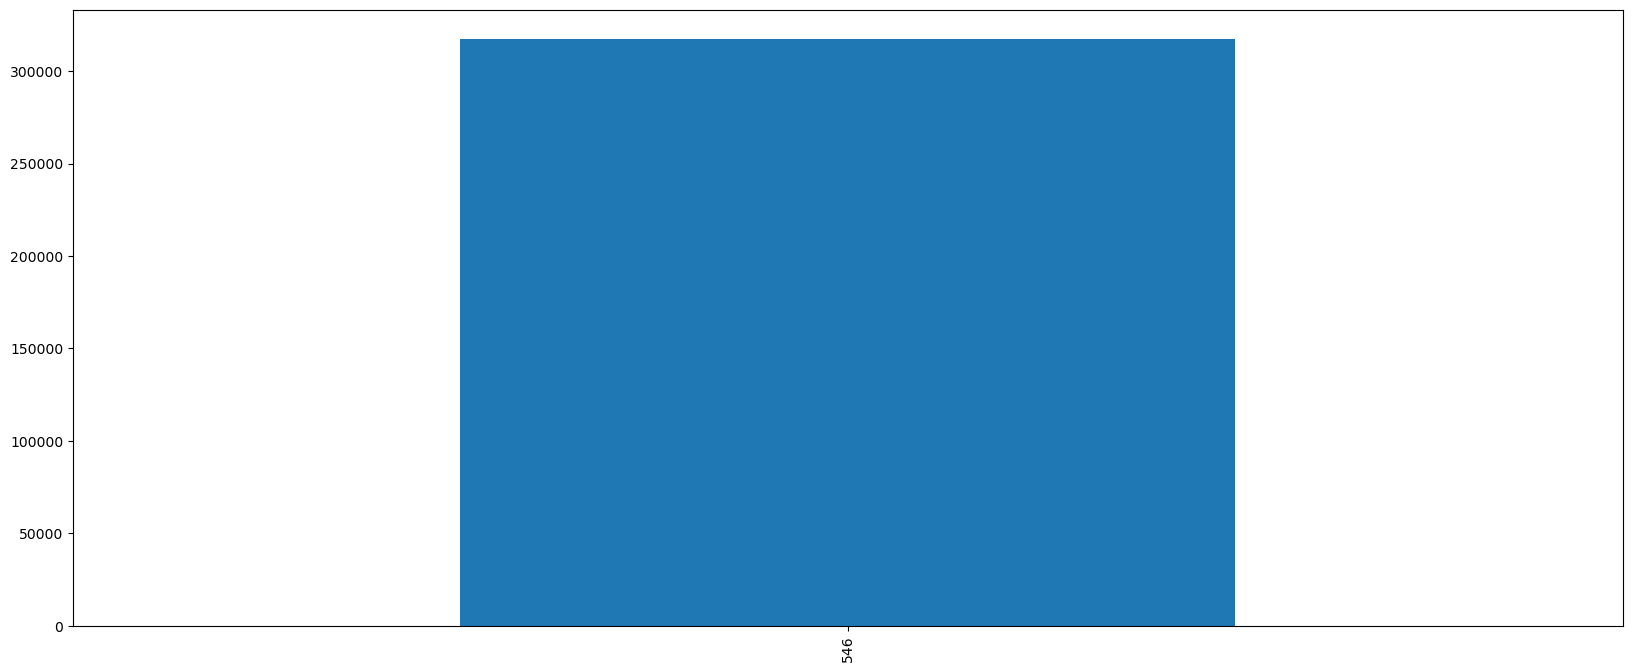

In [12]:
visualize_feature(df, 'Kuntanro')

We see from the plot that feature 'Kuntarno' has only one label as it is an identifier for a municipality and we have only data from one municipality Oulu. Therefore, we can drop this feature from modeling.

### KUNTA

KUNTA 



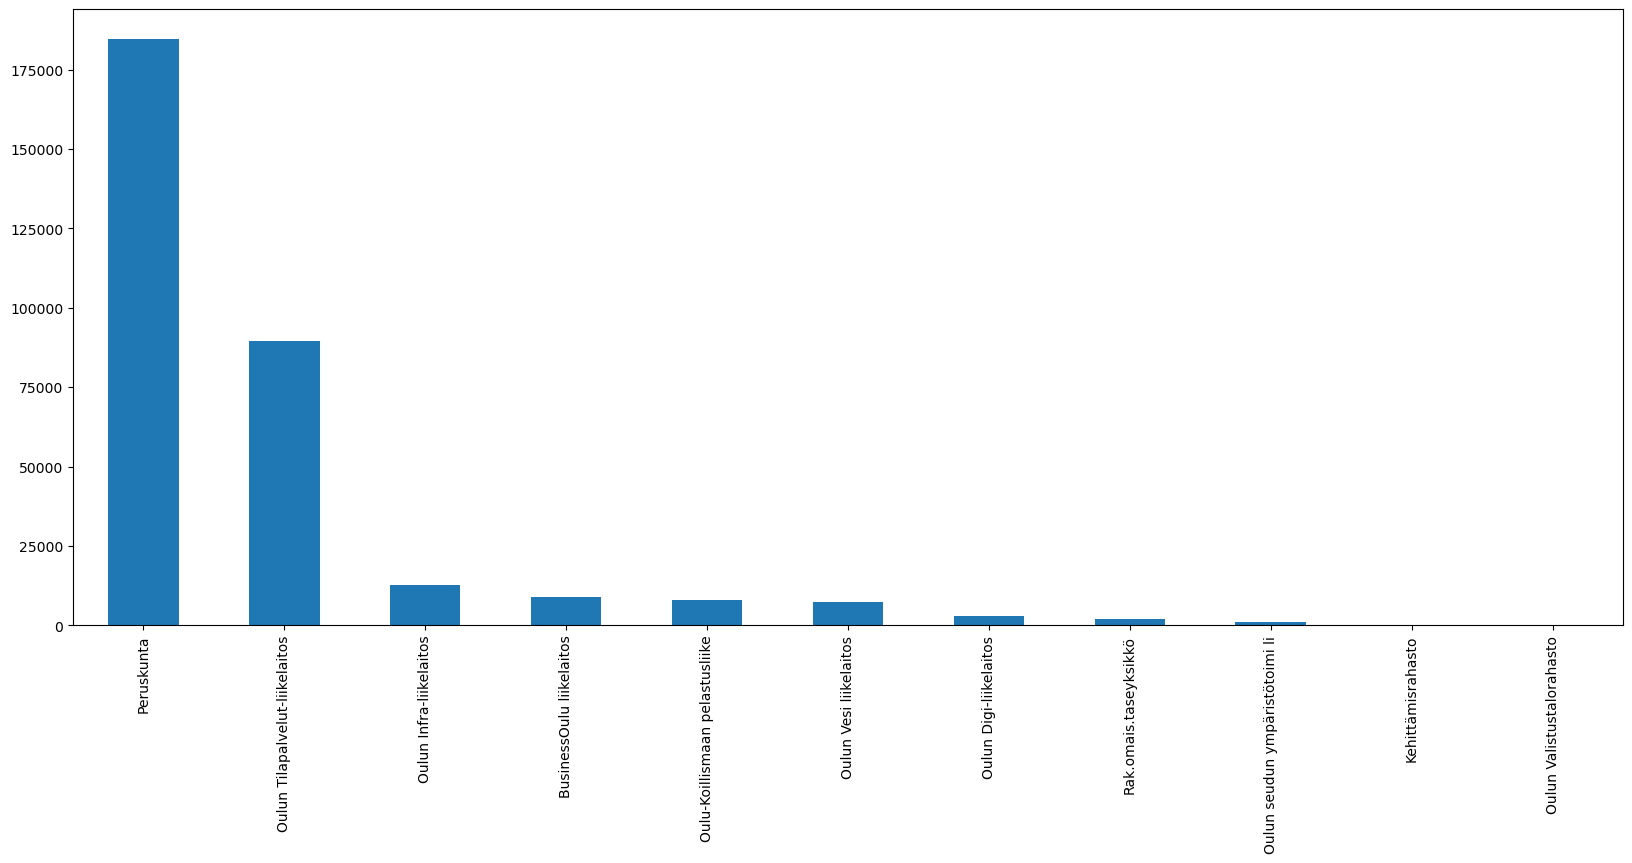

In [13]:
visualize_feature(df, 'KUNTA')

As we see from the plot that some labels are highly representative in the data while some are very low. This can cause cardinality issue in the data when modeling and should be looked upon during data preparation.

### Oulun kaupungin Y-tunnus

Oulun kaupungin Y-tunnus 



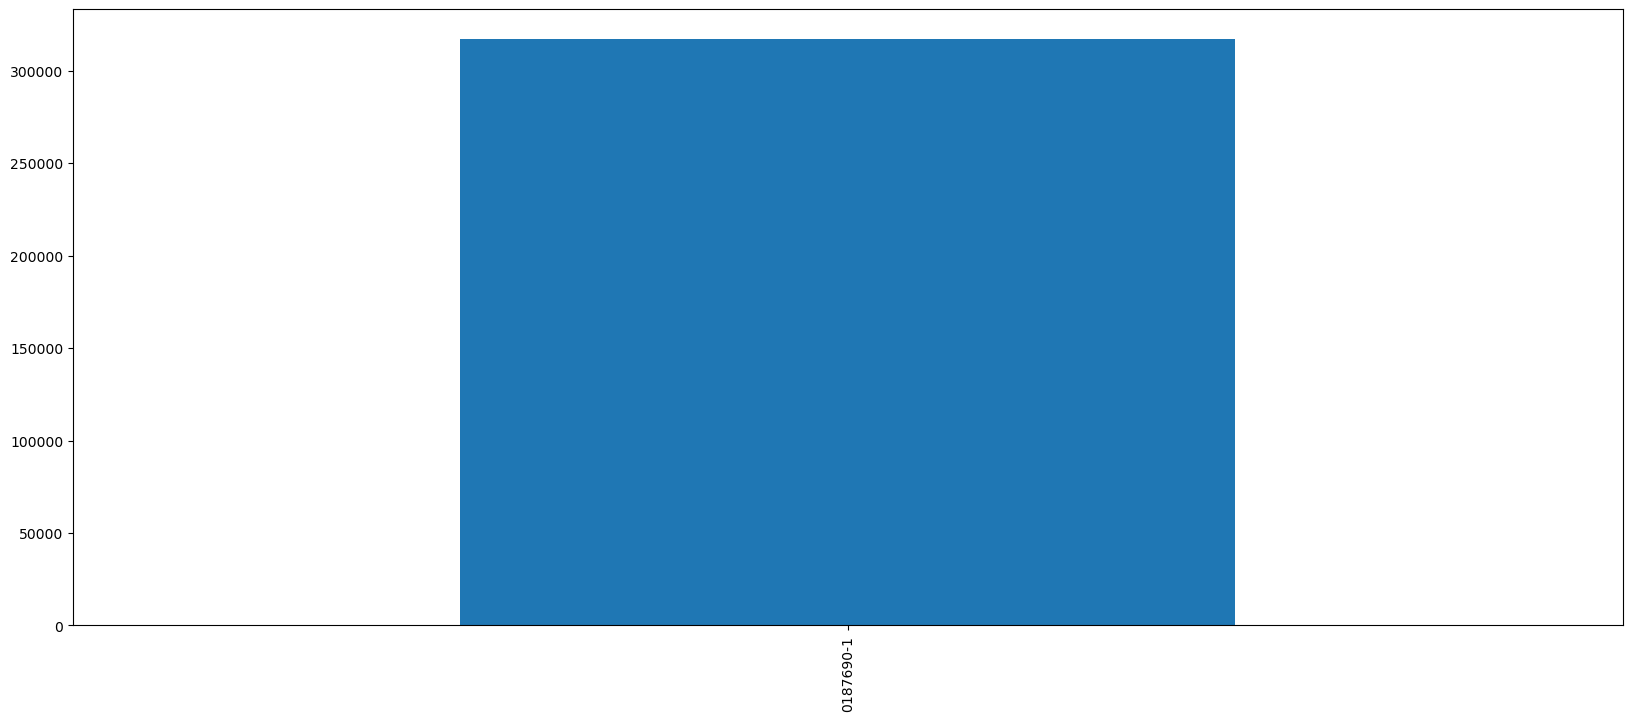

In [14]:
visualize_feature(df, 'Oulun kaupungin Y-tunnus')

Again, the feature 'Oulun kaupungin Y-tunnus' is an business id for the Oulu city and therfore we only have one label for the feature. This feature can be dropped from the modeling.

### 'Tosite numero'

This features is just an identifier for the document record and does not provide any importance in the modeling, so it can be dropped

### Toimittajan nimi 

Toimittajan nimi 



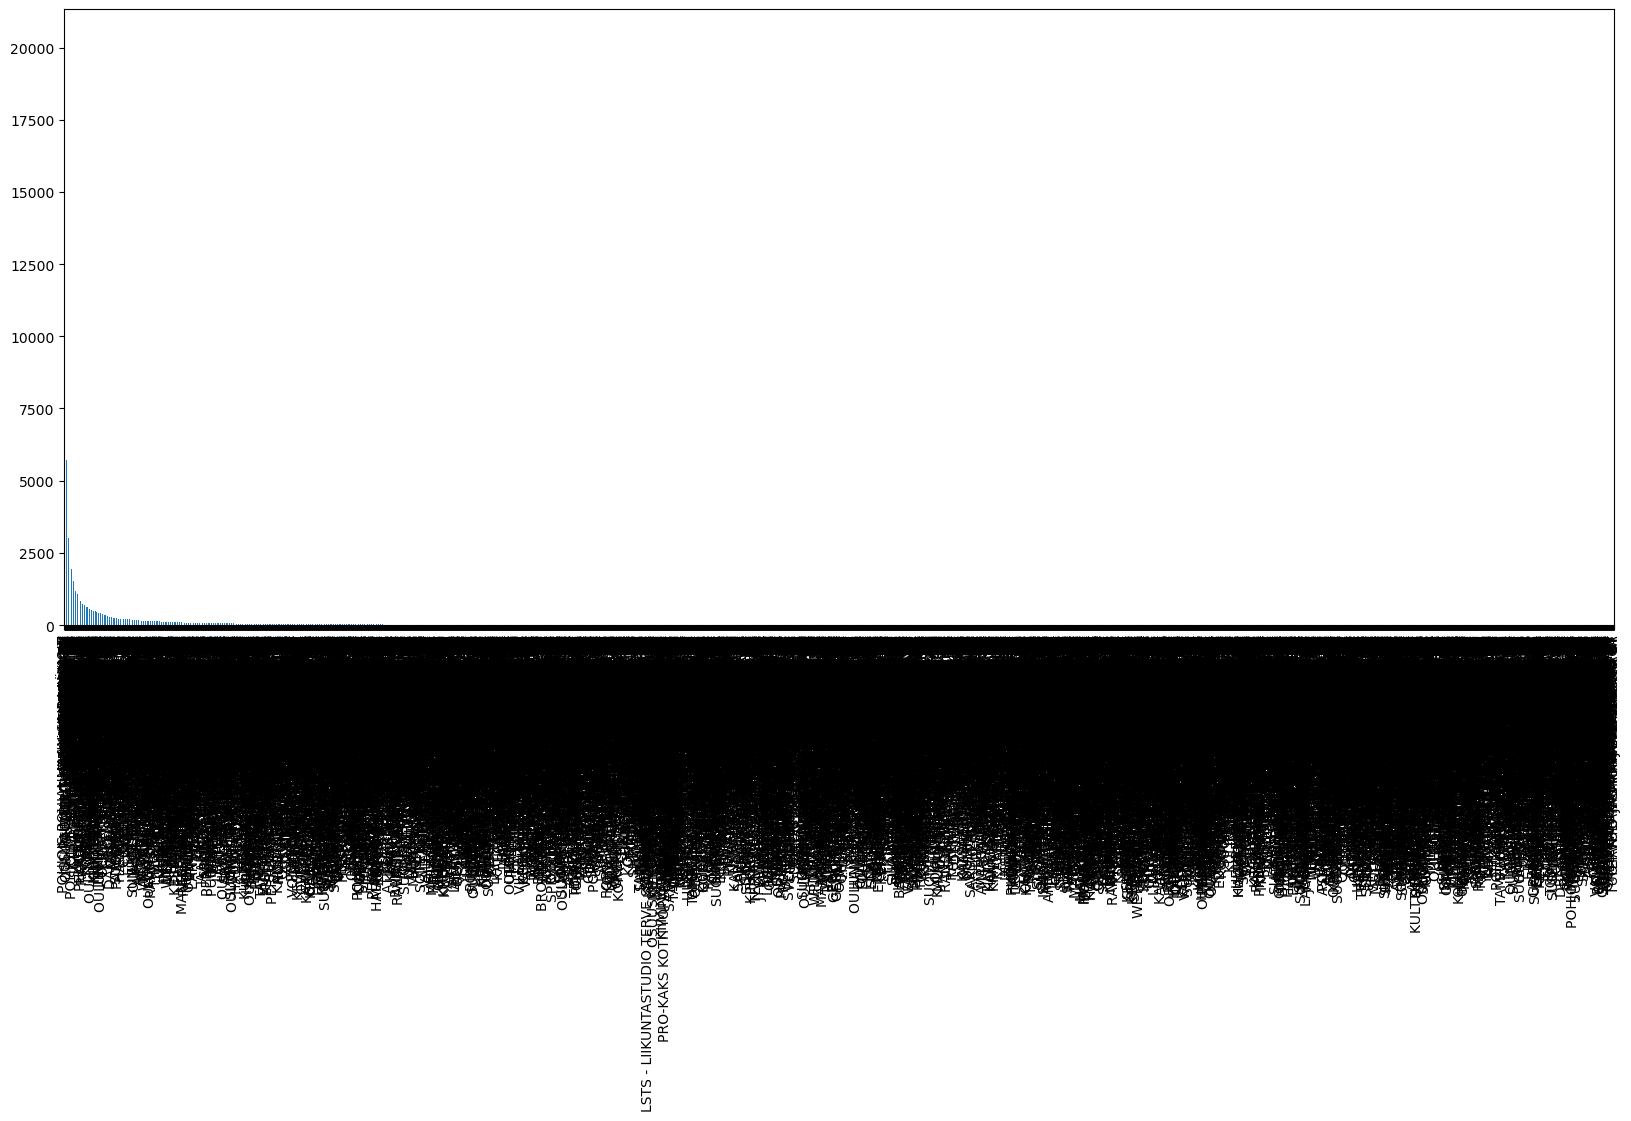

In [15]:
visualize_feature(df, 'Toimittajan nimi')

From the plot we can see that the feature 'Toimittajan nimi' is highly skewed and again can generate cardinality issue in the modeling.

### Toimittajan y-tunnus 

Toimittajan y-tunnus 



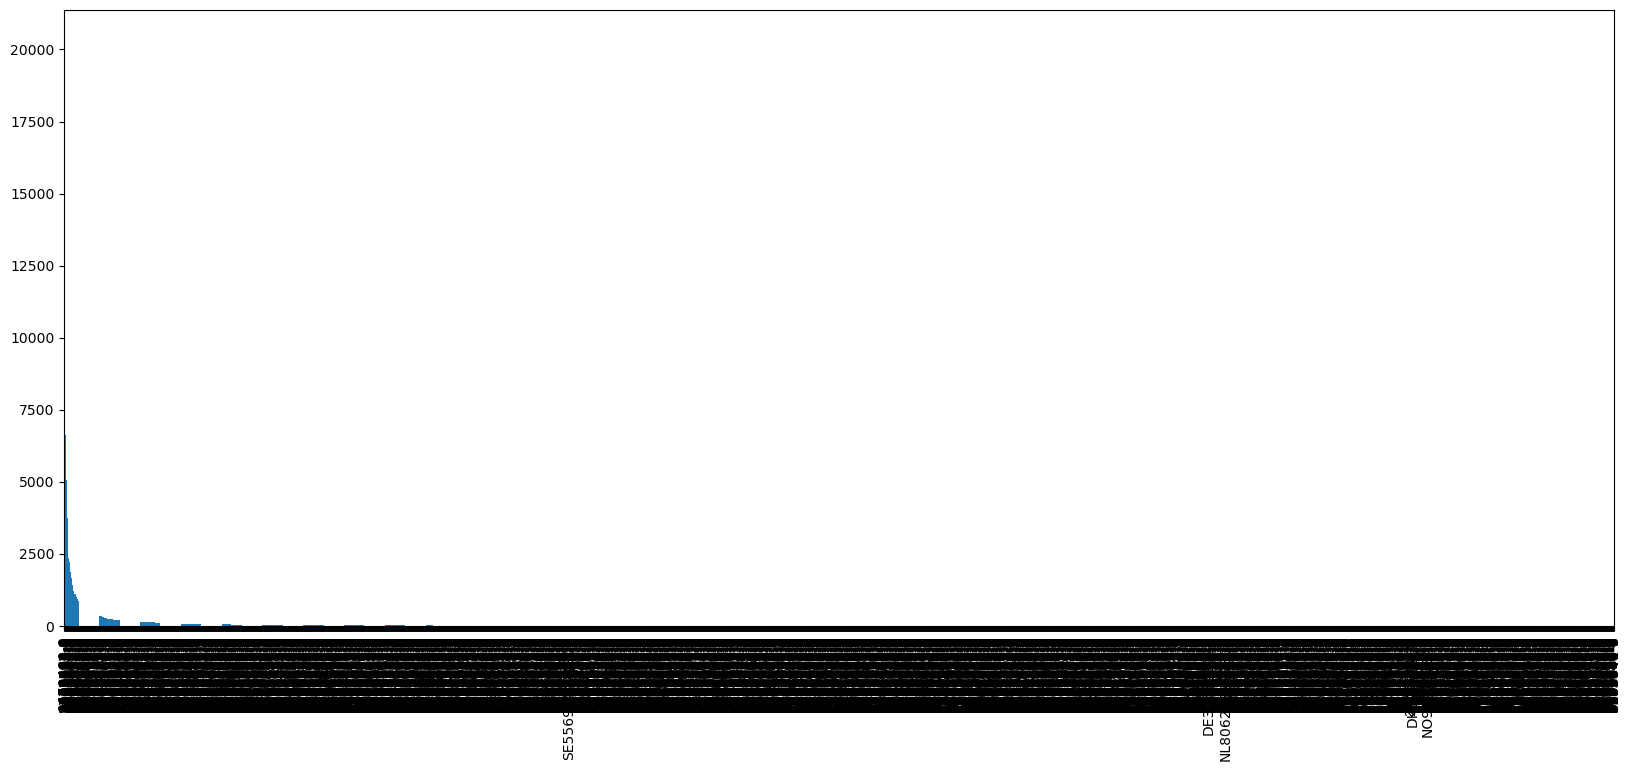

In [16]:
visualize_feature(df, 'Toimittajan y-tunnus')

Features 'Toimittajan nimi' and 'Toimittajan y-tunnus' are representing same information. Therefore we may keep only one of the feature in the modeling.

### Toimittajan maakoodi

Toimittajan maakoodi 



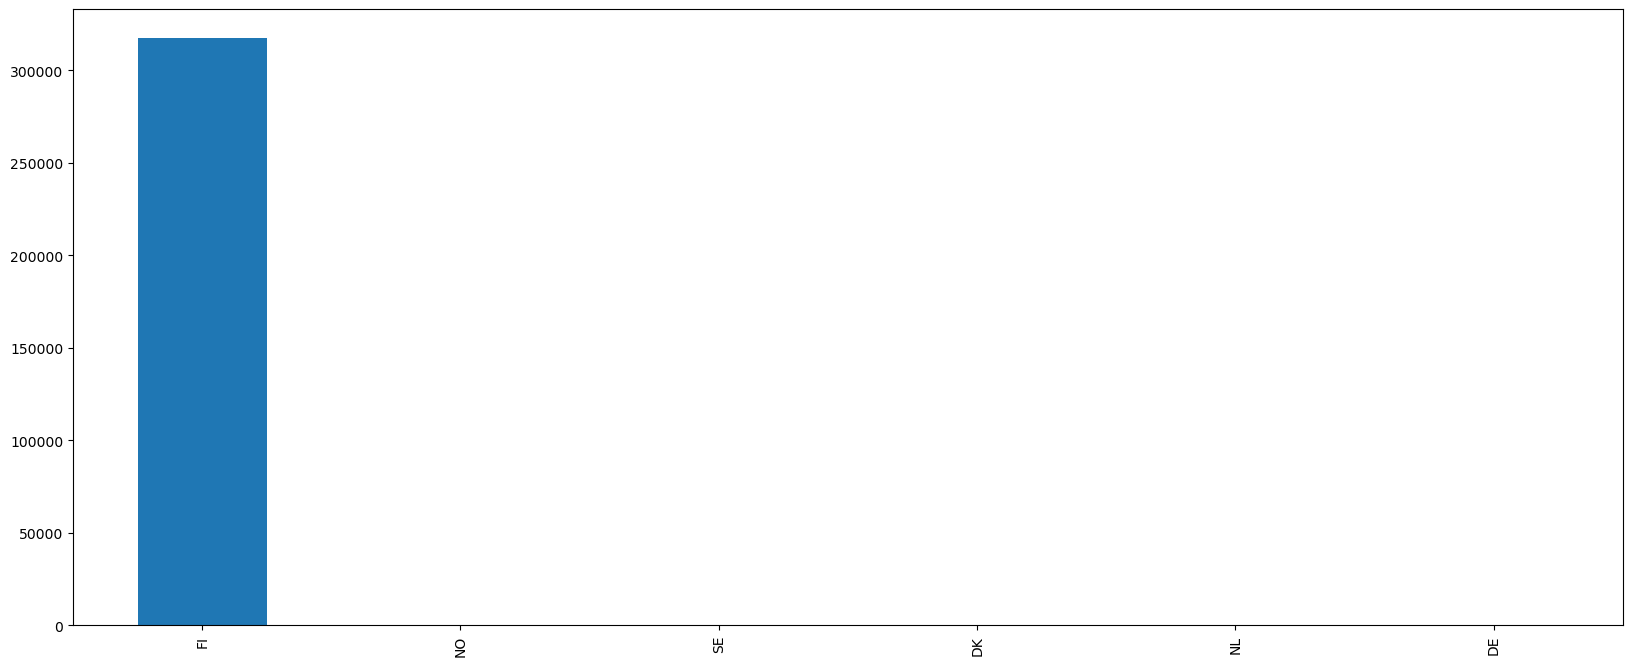

In [17]:
visualize_feature(df, 'Toimittajan maakoodi')

Same cardinlaity issue can be seen here from the plot where one of the label is highly representative that others.

### Laskun summa ilman ALV:tä 

Laskun summa ilman ALV:tä 



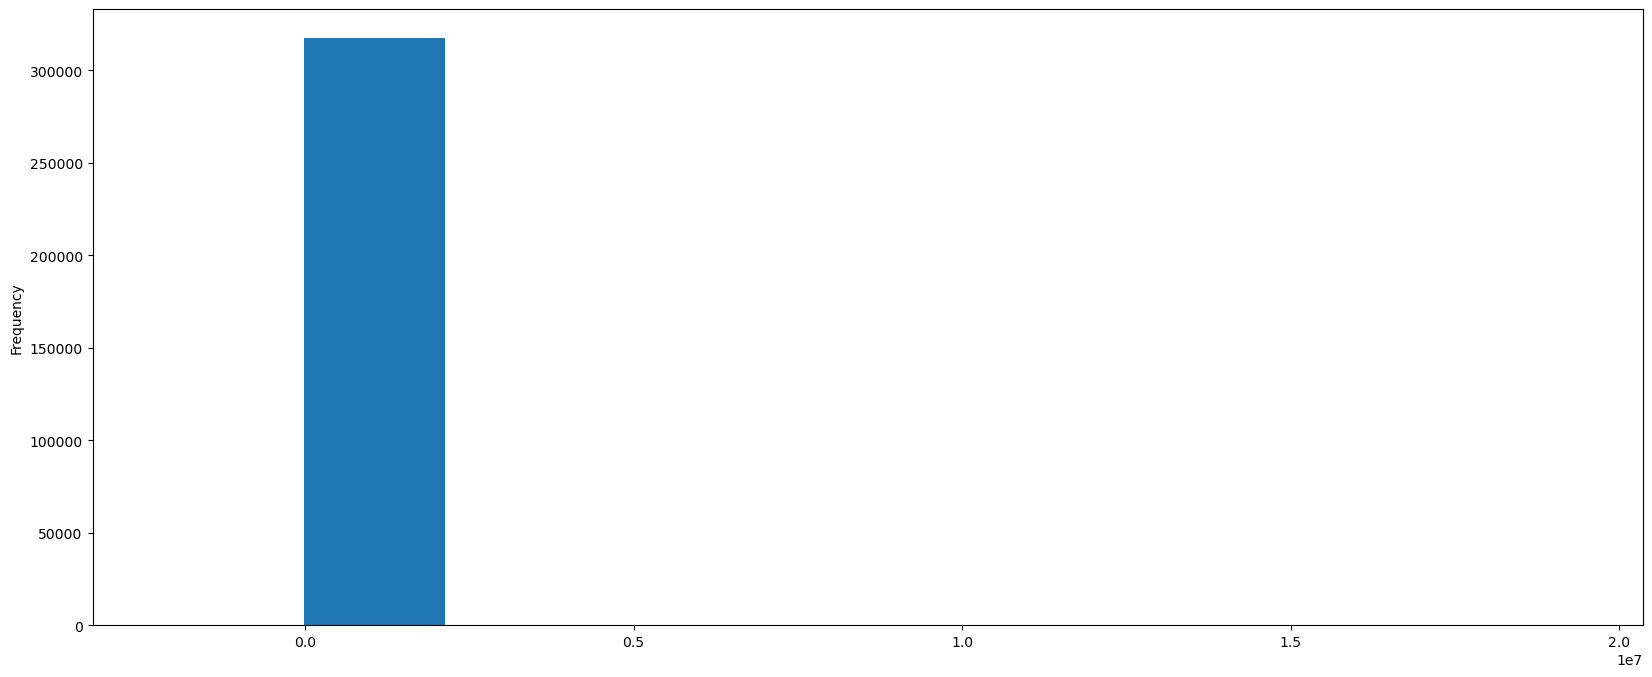

In [18]:
visualize_feature(df, 'Laskun summa ilman ALV:tä')

The feature 'Laskun summa ilman ALV:tä' also seems to be highly skewed that can effect the modeling. Therfore feature transformation may be required.

### TILI

TILI 



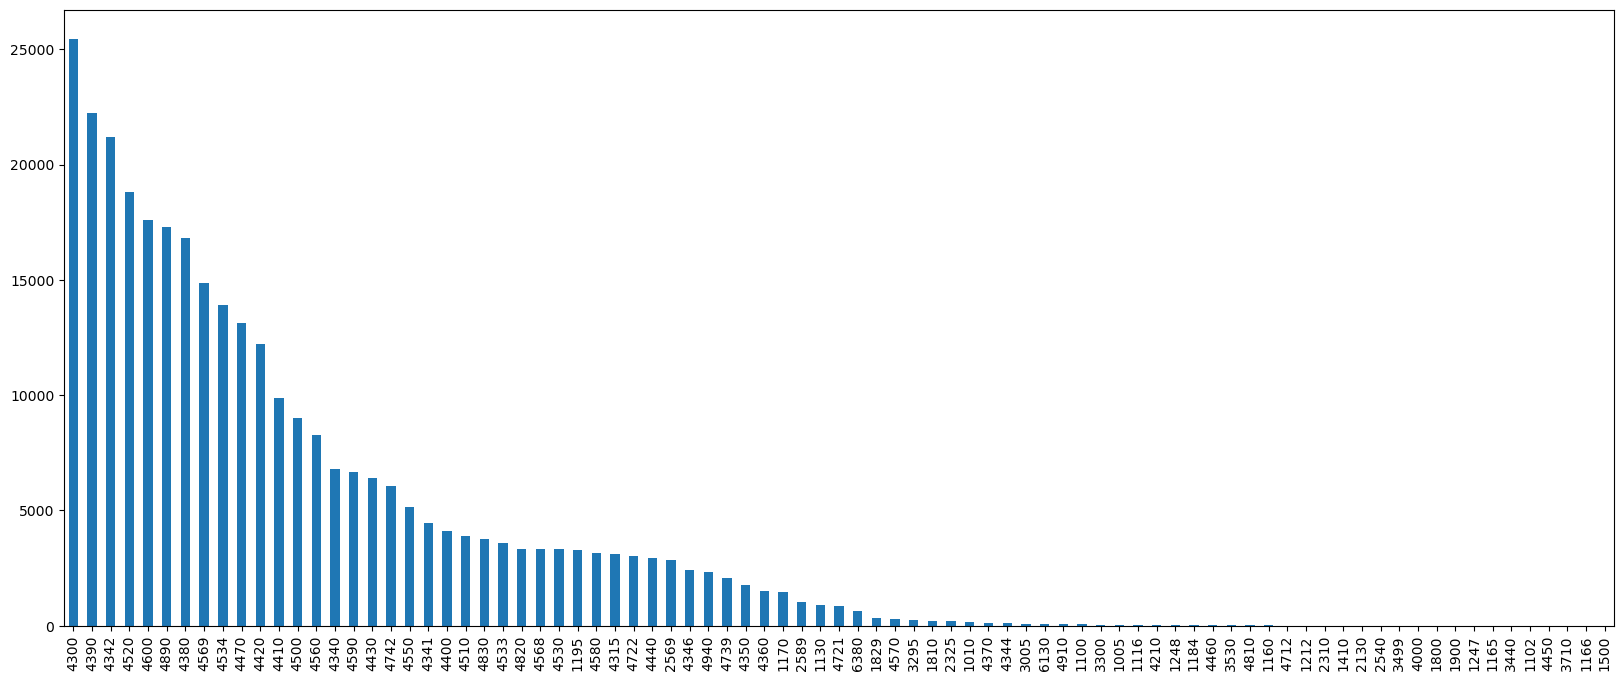

In [19]:
visualize_feature(df, 'TILI')

The feature 'TILI' seems to skewness and since this is going to be our target feature, misrepresentation of some catgories might be a seroius issue during modeling. Some categories being so sparsely represented may not even be included in the training data during train test split. Therefore, we might want to recategorise the rare labels into a single group for the modeling.

In [20]:
## number of categories
df['TILI'].nunique()

83

In [21]:
df['TILI'].value_counts().describe()

count       83.000000
mean      3823.722892
std       6047.319778
min          1.000000
25%         16.000000
50%        844.000000
75%       4001.000000
max      25443.000000
Name: TILI, dtype: float64

In [22]:
df['TILI'].value_counts()[df['TILI'].value_counts(normalize=True) >=0.003]

4300    25443
4390    22242
4342    21216
4520    18811
4600    17594
4890    17301
4380    16810
4569    14878
4534    13924
4470    13129
4420    12239
4410     9880
4500     9011
4560     8288
4340     6806
4590     6657
4430     6396
4742     6053
4550     5171
4341     4436
4400     4119
4510     3883
4830     3764
4533     3580
4820     3338
4568     3330
4530     3329
1195     3275
4580     3135
4315     3121
4722     3042
4440     2935
2569     2852
4346     2407
4940     2326
4739     2082
4350     1766
4360     1526
1170     1486
2589     1032
Name: TILI, dtype: int64

In [23]:
(df['TILI'].value_counts(normalize=True) >=0.003).sum()

40

By keeping categories in feature 'TILI' that represents at least 0.3% of the data records we maintain 40 categories, that is almost half of them.

From the summary of the counts for the categories in the feature 'TILI', we can see that 25% of them have counts equal to less than 16. This is very low count(records) for training a model. Therefore, we will need to put those low count categories into a single category for better representation. Considering the number of categories and their counts, we will put all the categories that are represented less than 0.3% in the data to a single group. When recategorizing the low represented categories into a single group, we also need to make sure that we do not leave out many categories.

### TILIN NIMI

TILIN NIMI 



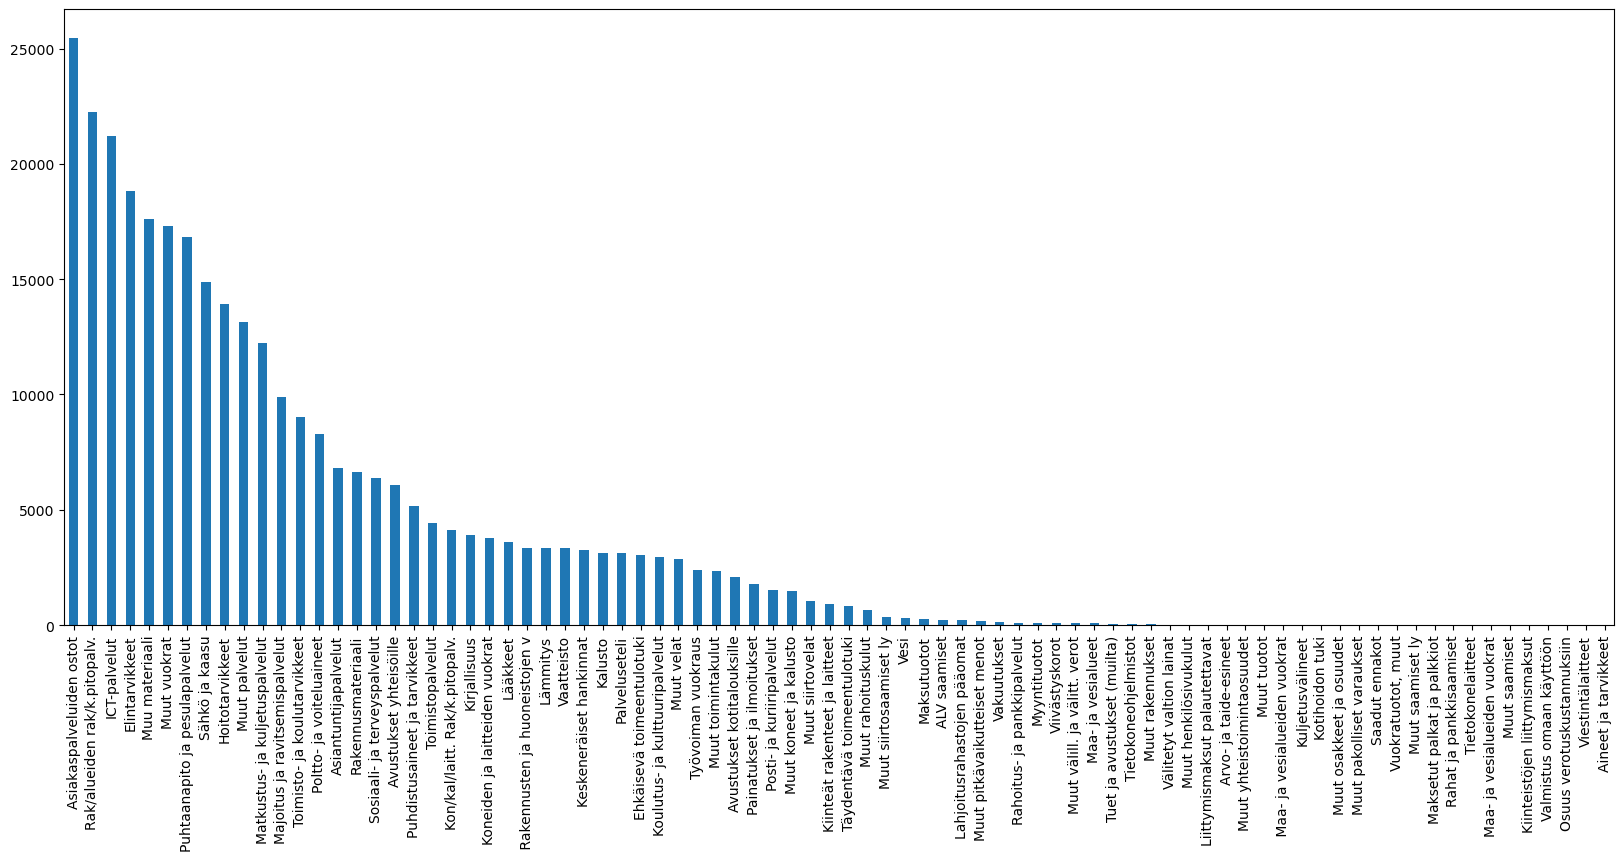

In [24]:
visualize_feature(df, 'TILIN NIMI')

Feature 'TILIN NIMI' is the same as 'TILI' and so we can drop one of the feature among them.

### Kokonaissumma 

Kokonaissumma 



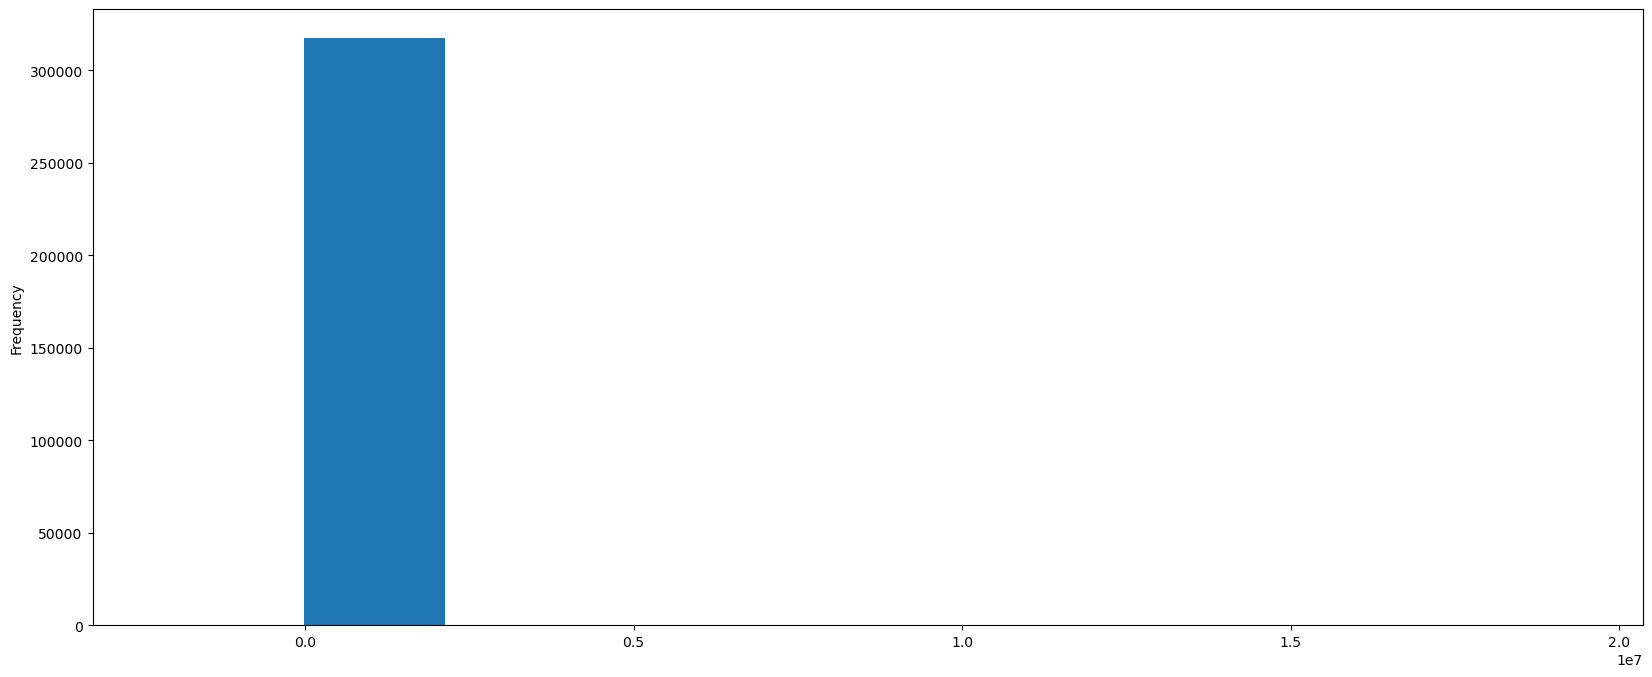

In [25]:
visualize_feature(df, 'Kokonaissumma')

Here we again see the problem of skewness that may need to be handled with data transformation for the modeling.

### ALV-KOODI

ALV-KOODI 



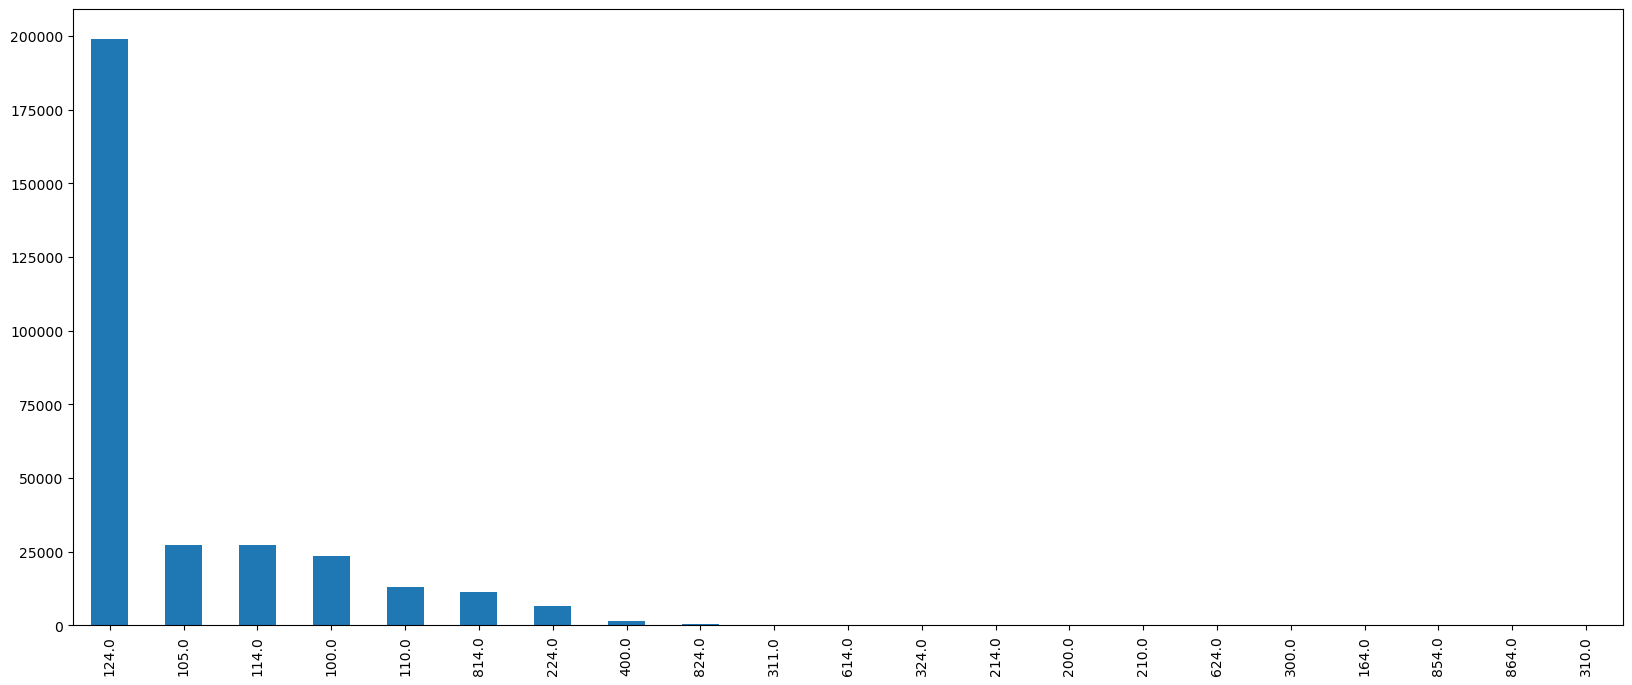

In [26]:
visualize_feature(df, 'ALV-KOODI')

'ALV-KOODI' is our another target feature and we see the same skeweness issue here. We might do the dame recategorization of the feature.

In [27]:
# number of categories
df['ALV-KOODI'].nunique()

21

In [28]:
df['ALV-KOODI'].value_counts().describe()

count        21.000000
mean      14825.523810
std       43260.350689
min           1.000000
25%          14.000000
50%         203.000000
75%       11459.000000
max      199111.000000
Name: ALV-KOODI, dtype: float64

In [29]:
df['ALV-KOODI'].value_counts()[df['ALV-KOODI'].value_counts(normalize=True) >=0.0002]

124.0    199111
105.0     27432
114.0     27290
100.0     23597
110.0     13041
814.0     11459
224.0      6457
400.0      1401
824.0       644
311.0       258
614.0       203
324.0       195
214.0        99
200.0        86
Name: ALV-KOODI, dtype: int64

In [30]:
(df['ALV-KOODI'].value_counts(normalize=True) >=0.0002).sum()

14

For recategorizing the categories in the feature 'ALV-KOODI', we may consider to put categories that have less than 0.02% of the total records in the data into a single category.

### RIVIN OSUUS VERO 

RIVIN OSUUS VERO 



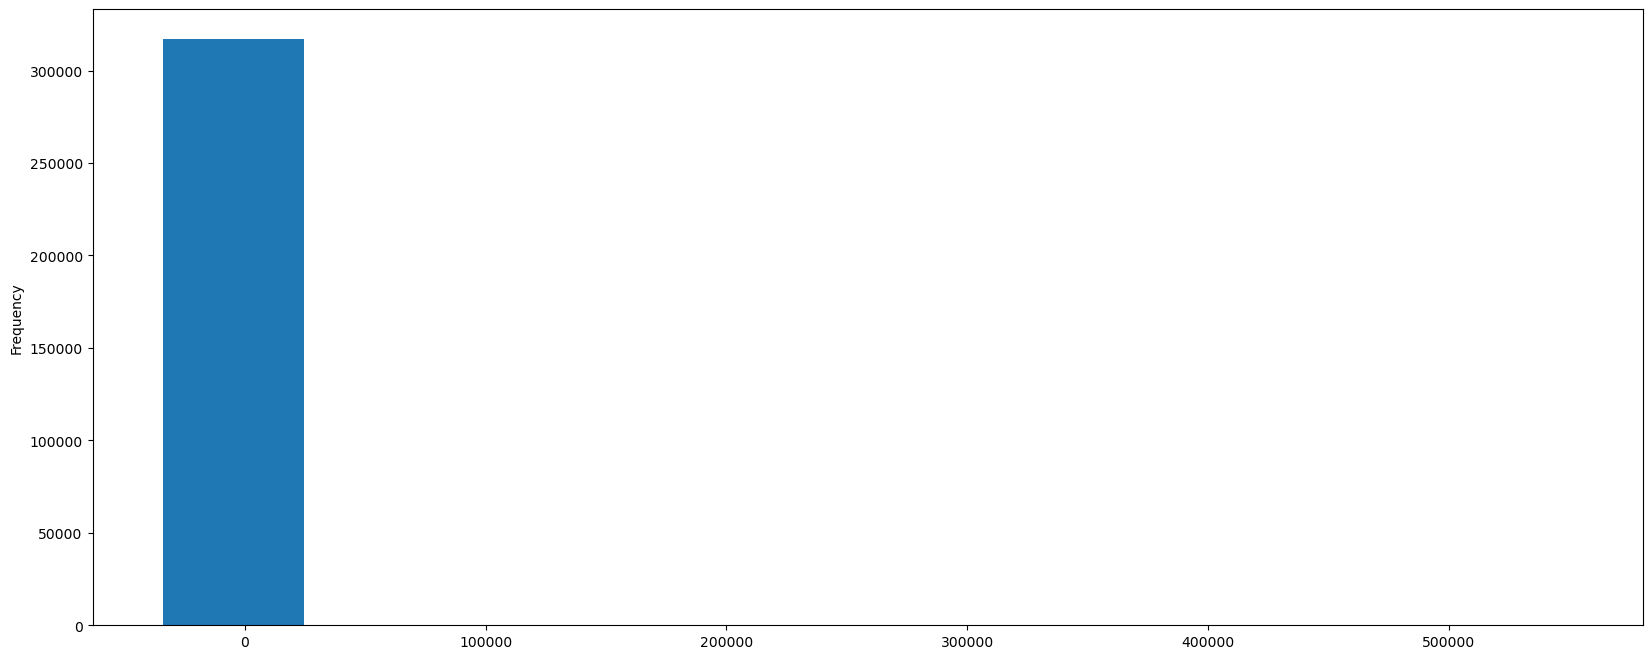

In [31]:
visualize_feature(df, 'RIVIN OSUUS VERO')

Again we see skweness in the feature.

### Kustannuspaikka 

Kustannuspaikka 



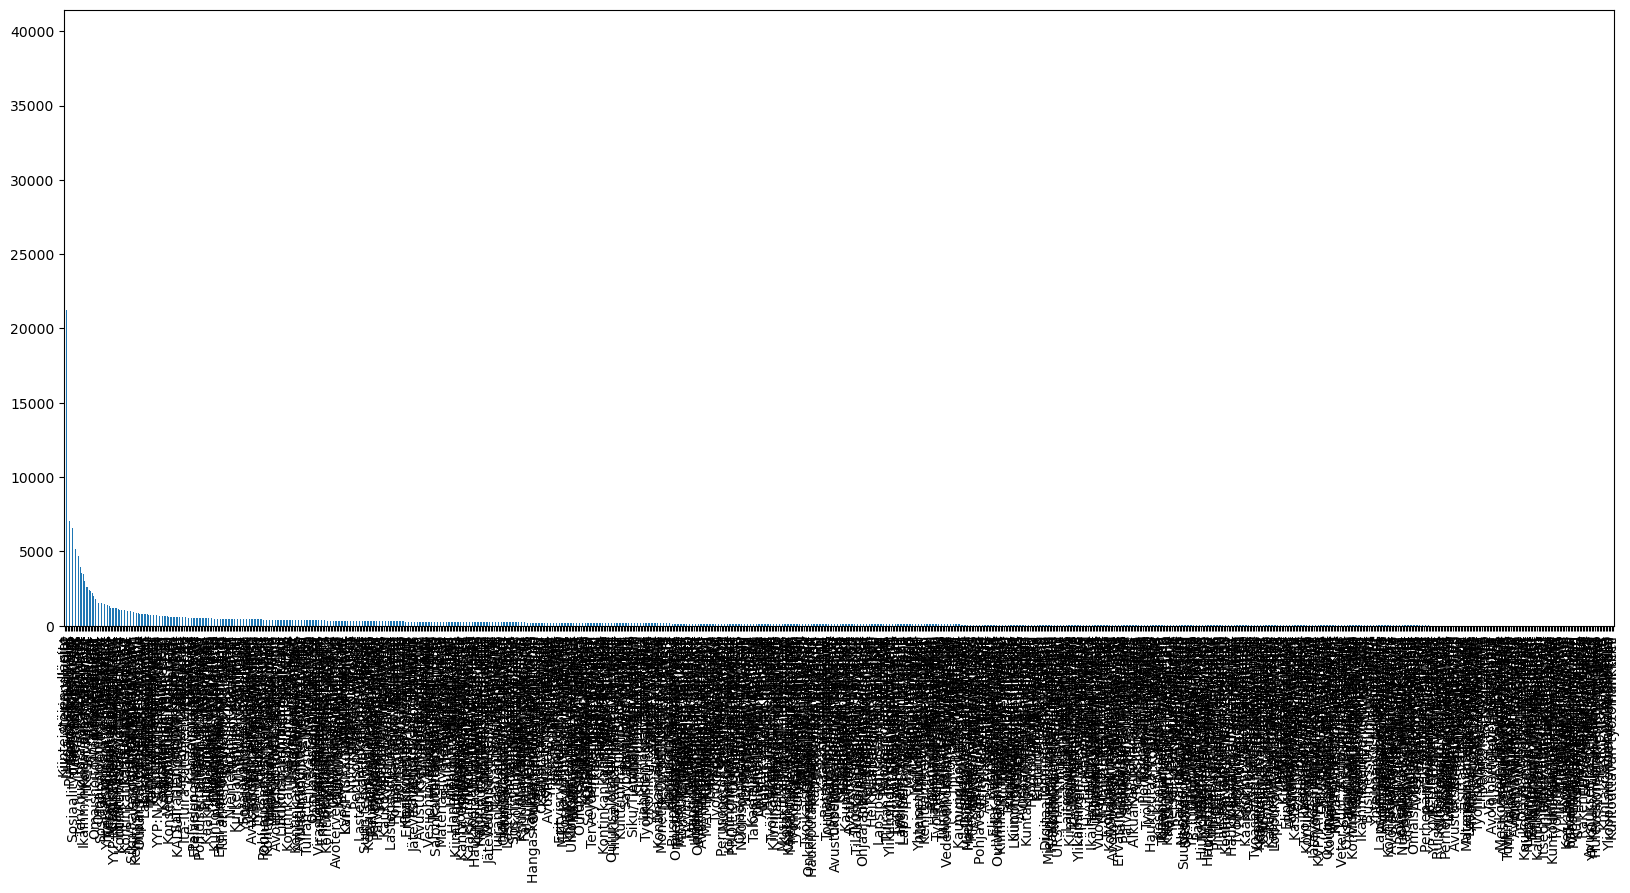

In [32]:
visualize_feature(df, 'Kustannuspaikka')

The feature has high number of category labels but does not seem to be severely skewed.

### Tositepäivämäärä_month 

Tositepäivämäärä_month 



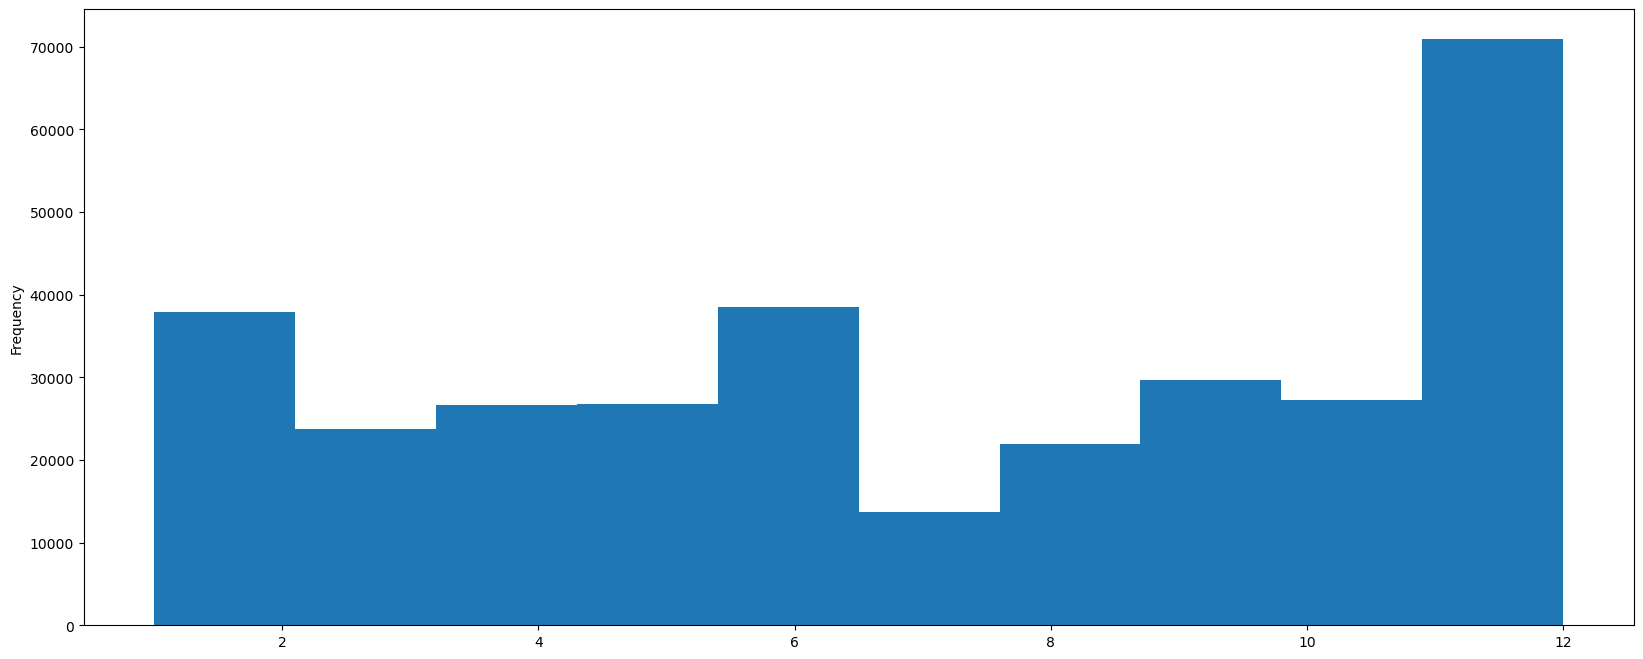

In [33]:
visualize_feature(df, 'Tositepäivämäärä_month')

### Tositepäivämäärä_day

Tositepäivämäärä_day 



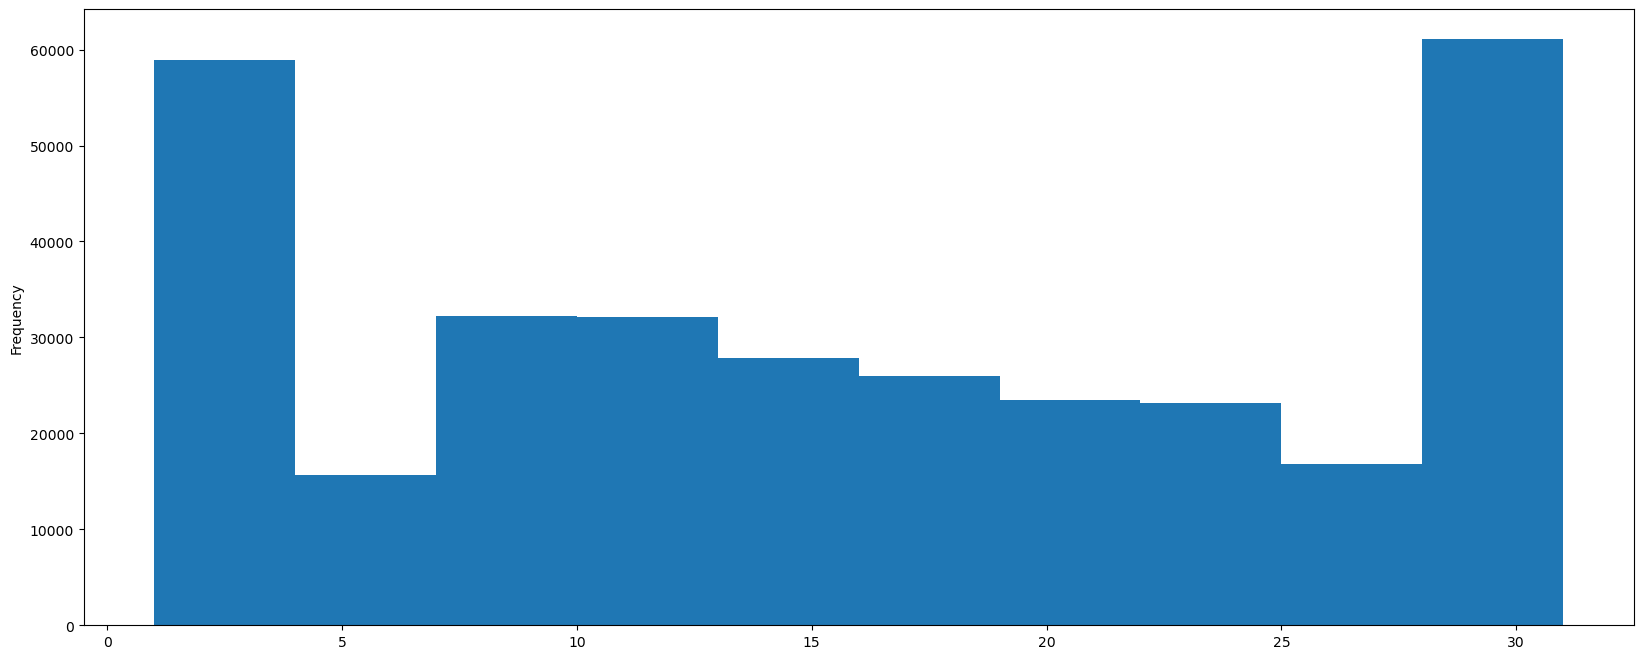

In [34]:
visualize_feature(df, 'Tositepäivämäärä_day')

In [35]:
## list the features to consider further in the modeling

modeling_features = ['KUNTA', 'Toimittajan nimi','Toimittajan maakoodi', 'Laskun summa ilman ALV:tä', 'TILI', 'Kokonaissumma', 'ALV-KOODI',
                     'RIVIN OSUUS VERO','Kustannuspaikka', 'Tositepäivämäärä_month', 'Tositepäivämäärä_day']

In [36]:
df_modeling = df[modeling_features]

In [37]:
df_modeling.shape

(317369, 11)

In [38]:
# save the data
df_modeling.to_csv('data_modeling.csv', index = False)

## EXPLORE RELATION BETWEEN TARGET AND INDEPENDENT FEATURES

For simiplicty we will visualize the relationship of some numerical input features with the target features 'TILI' and 'ALV-KOODI'

In [39]:
df.head()

,Kuntanro,KUNTA,Oulun kaupungin Y-tunnus,Tosite numero,Toimittajan nimi,Toimittajan y-tunnus,Toimittajan maakoodi,Laskun summa ilman ALV:tä,Tositepäivämäärä,TILI,TILIN NIMI,Palveluluokka,Kokonaissumma,ALV-KOODI,RIVIN OSUUS VERO,Kustannuspaikka,Tositepäivämäärä_month,Tositepäivämäärä_day
0,546,Peruskunta,0187690-1,32_235,Yksityinen elinkeinonharjoittaja,1928481-6,FI,116.23,210108,4520,Elintarvikkeet,NaN,132.50,114.0,16.27,Oulun Suom. Yhteiskoulun lukio,1,8
1,546,Peruskunta,0187690-1,32_315,Yksityinen elinkeinonharjoittaja,1614970-7,FI,89.78,210111,4300,Asiakaspalveluiden ostot,NaN,94.50,105.0,4.72,Terapiaostopalvelut,1,11
2,546,Peruskunta,0187690-1,32_326,Yksityinen elinkeinonharjoittaja,2948163-7,FI,135.00,210111,4340,Asiantuntijapalvelut,NaN,167.40,124.0,32.40,Oulu-opisto,1,11
3,546,Peruskunta,0187690-1,32_421,Yksityinen elinkeinonharjoittaja,3136850-2,FI,149.00,210111,4510,Kirjallisuus,NaN,184.76,124.0,35.76,Yli-Iin koulu (0-9),1,11
4,546,Peruskunta,0187690-1,32_566,Yksityinen elinkeinonharjoittaja,1267479-0,FI,189.11,210112,4520,Elintarvikkeet,NaN,215.59,114.0,26.48,Pöllönkankaan koulu (1-9),1,12


### Laskun summa ilman ALV:tä - TILI

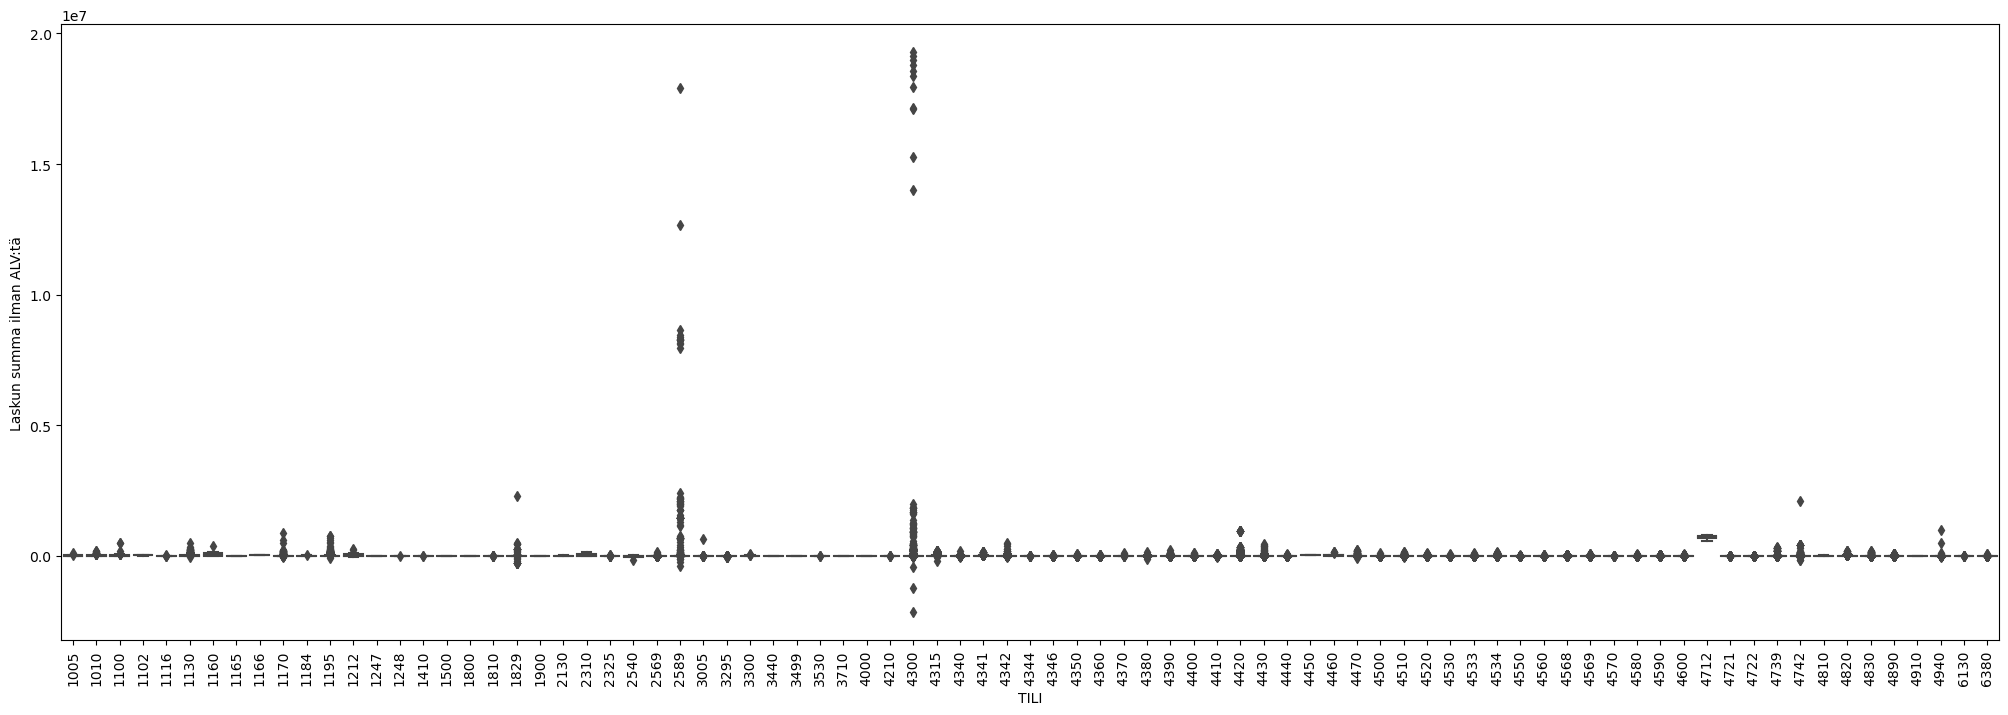

In [40]:
plt.figure(figsize = (25, 8))
sns.boxplot( x = 'TILI', y = 'Laskun summa ilman ALV:tä', data = df_modeling)
plt.xticks(rotation = 90)
plt.show()

As we see some Accounts have very hig range of values for the feature 'Laskun summa ilman ALV:tä'. This might be a good indication to identify the Accounts based on this feature.

### Laskun summa ilman ALV:tä - ALV-KOODI

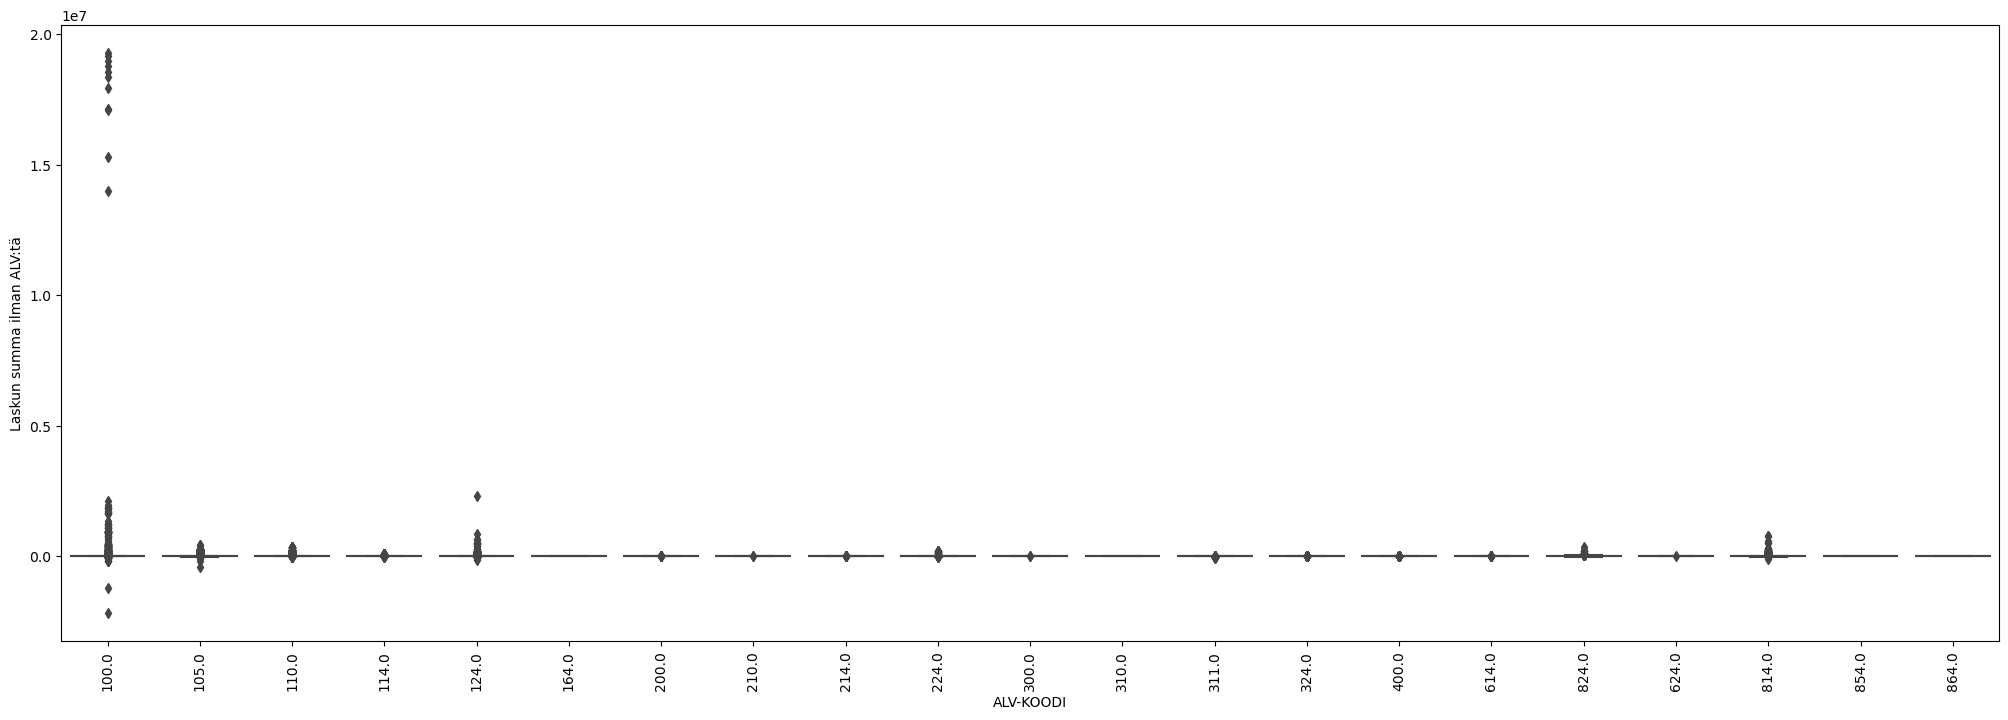

In [41]:
plt.figure(figsize = (25, 8))
sns.boxplot( x = 'ALV-KOODI', y = 'Laskun summa ilman ALV:tä', data = df_modeling)
plt.xticks(rotation = 90)
plt.show()

We see again the same case , where some categories in 'ALV-KOODI' have higher range of values for 'Laskun summa ilman ALV:tä'

### RIVIN OSUUS VERO - TILI

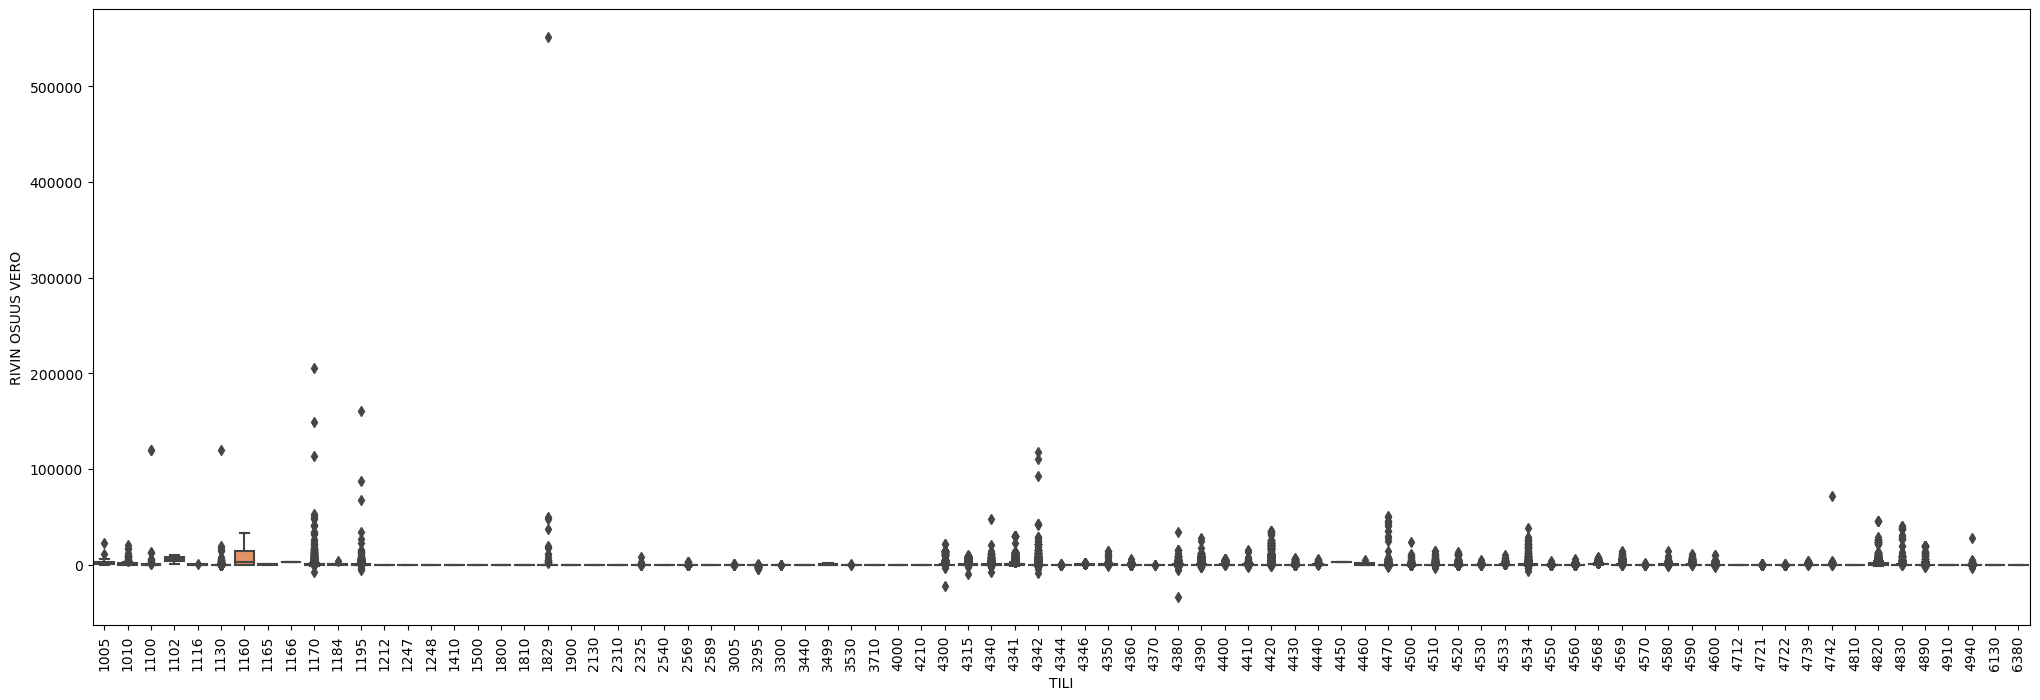

In [42]:
plt.figure(figsize = (25, 8))
sns.boxplot( x = 'TILI', y = 'RIVIN OSUUS VERO', data = df_modeling)
plt.xticks(rotation = 90)
plt.show()

### RIVIN OSUUS VERO - ALV-KOODI

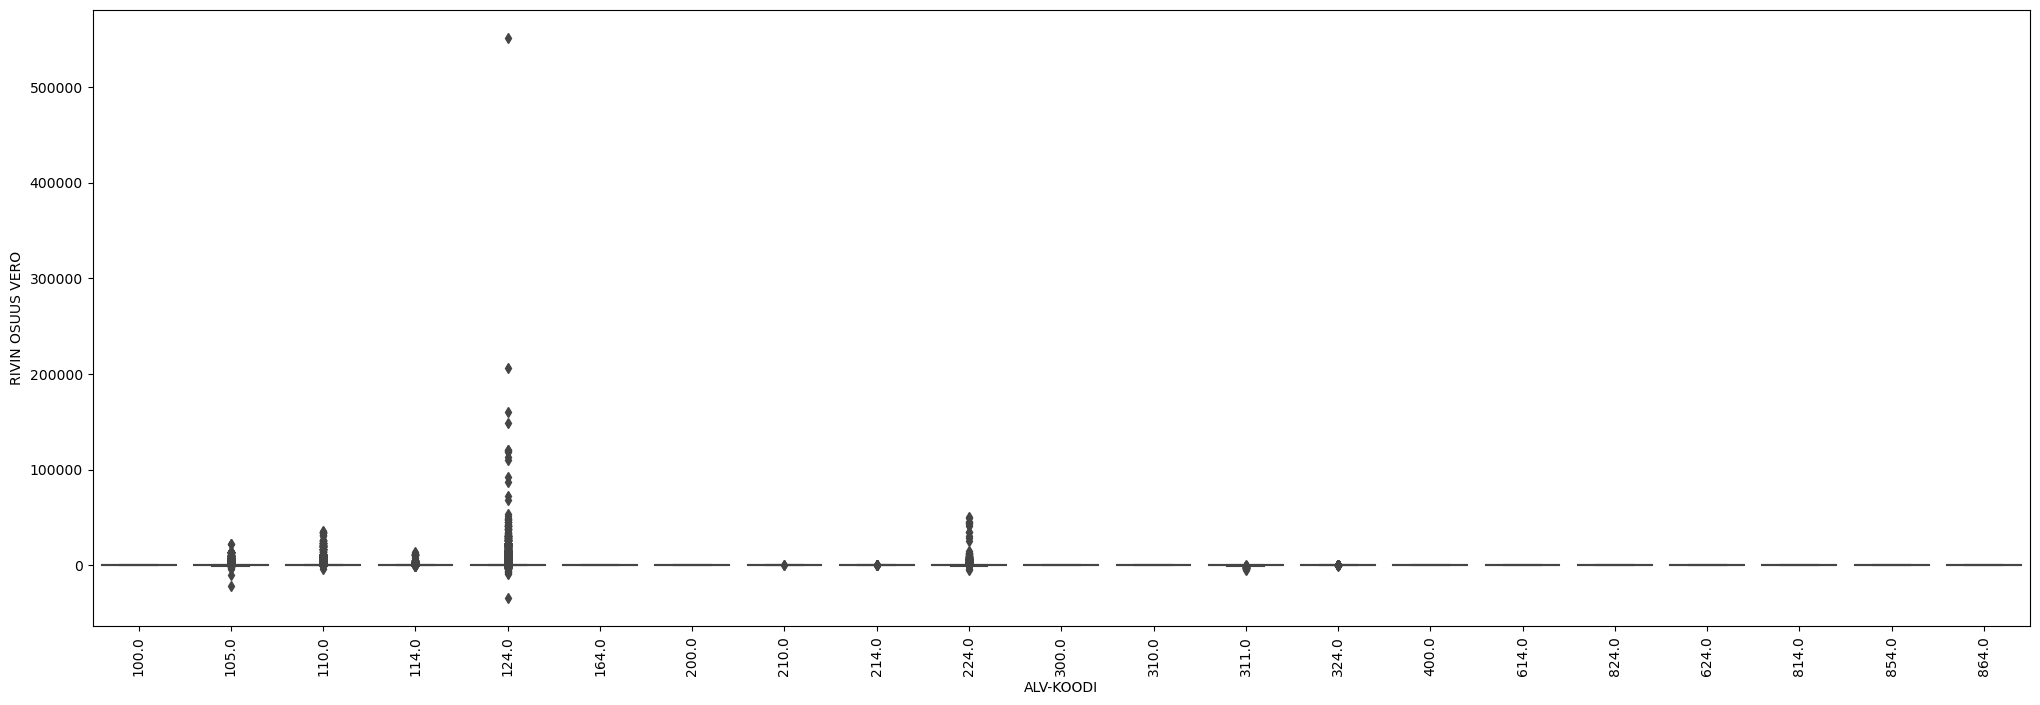

In [43]:
plt.figure(figsize = (25, 8))
sns.boxplot( x = 'ALV-KOODI', y = 'RIVIN OSUUS VERO', data = df_modeling)
plt.xticks(rotation = 90)
plt.show()

We again see a similar behavior, where the range of the values is very high for some categories compared to others. This might be again a good indication of the feature being useful in predicting the category.

### Correlation Plot

We have two target features 'TILI' and 'ALV-KOODI'. We will see the relation between the independent features and the two target features sepearately with correlation plots. Although correlation plot may not be the best method here to test the relation between the categorical target features and the mix of numerical and categorical input features, this gives us a general idea of the raltionship.

In [44]:
from dython.nominal import associations

### Features Relation with the Target 'TILI'

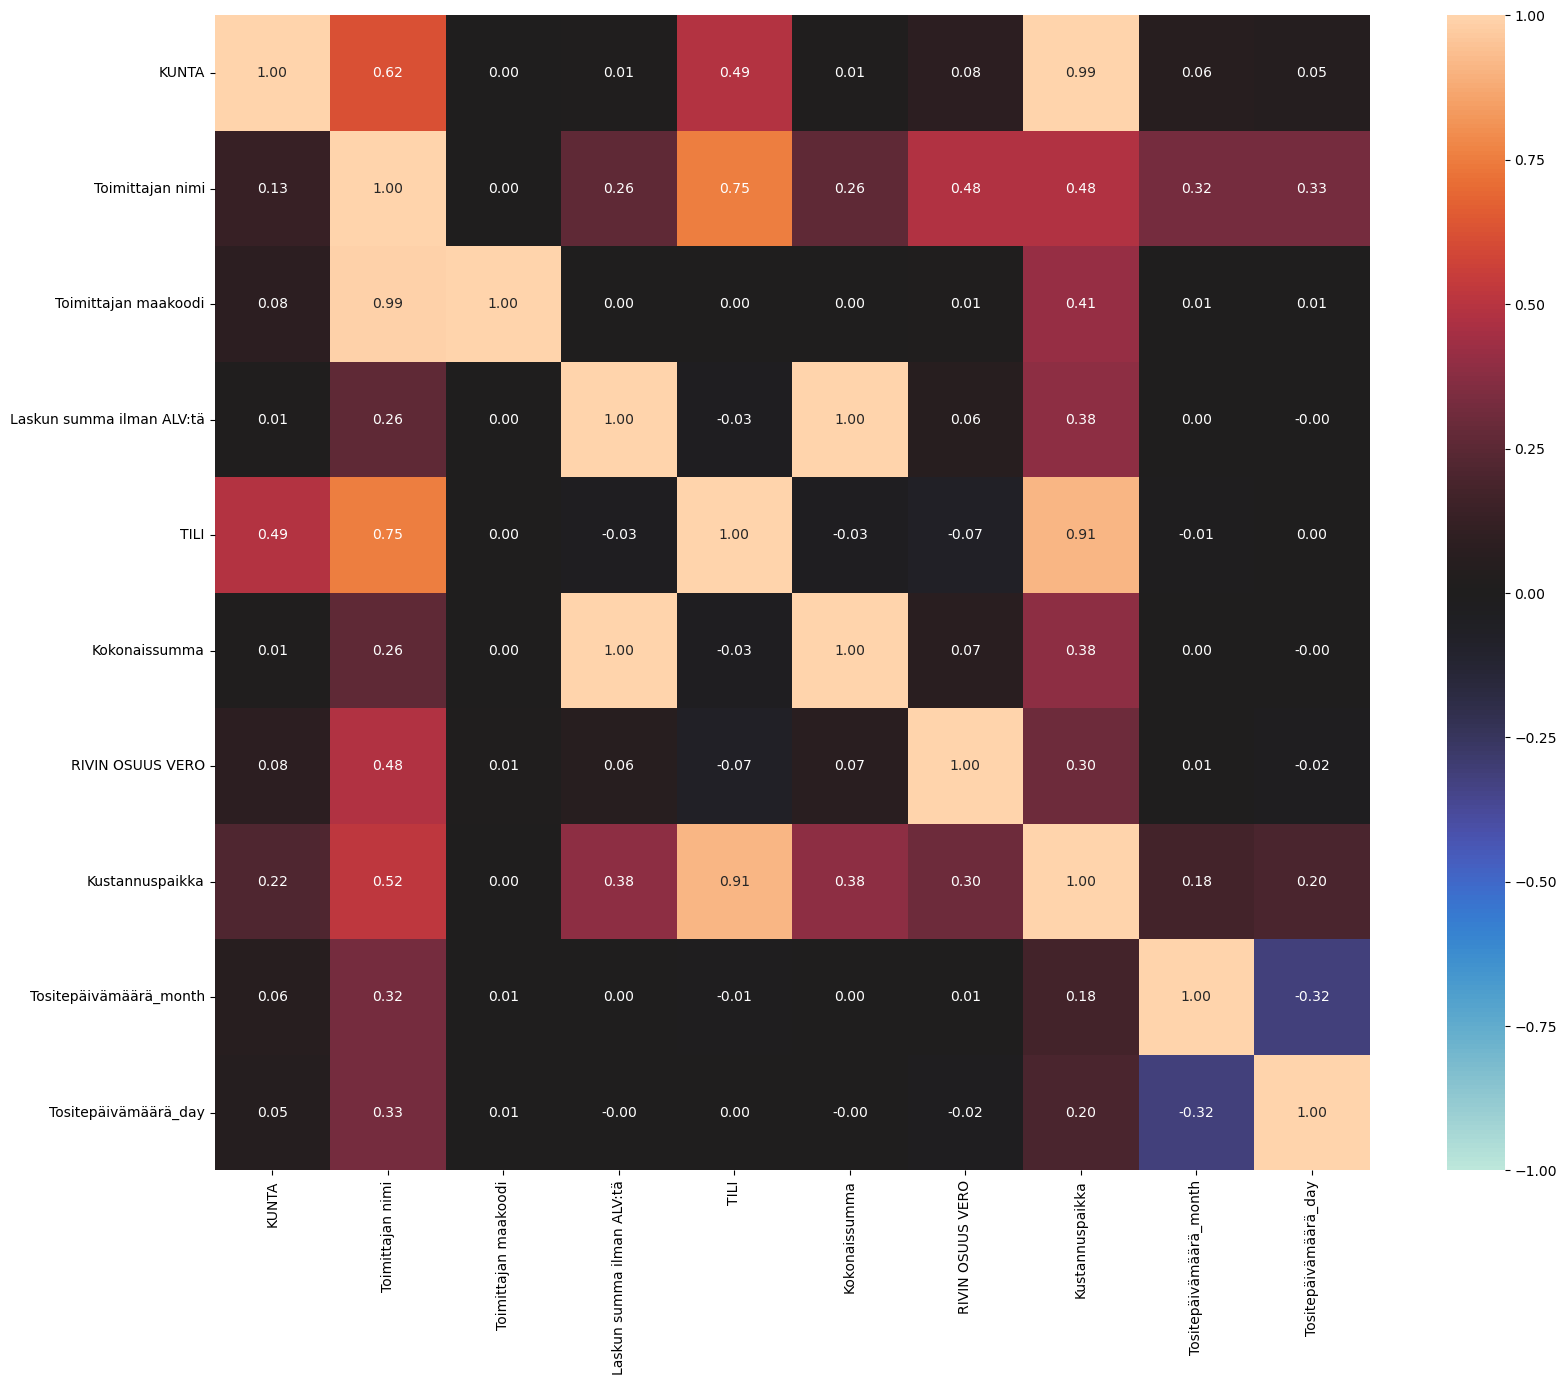

In [45]:
# for the sake of processing time we only will take 60% od the data
cor = associations(df_modeling.drop('ALV-KOODI', axis = 1).sample(frac = 0.6), figsize = (20, 15), nom_nom_assoc='theil' ) 

<AxesSubplot: >

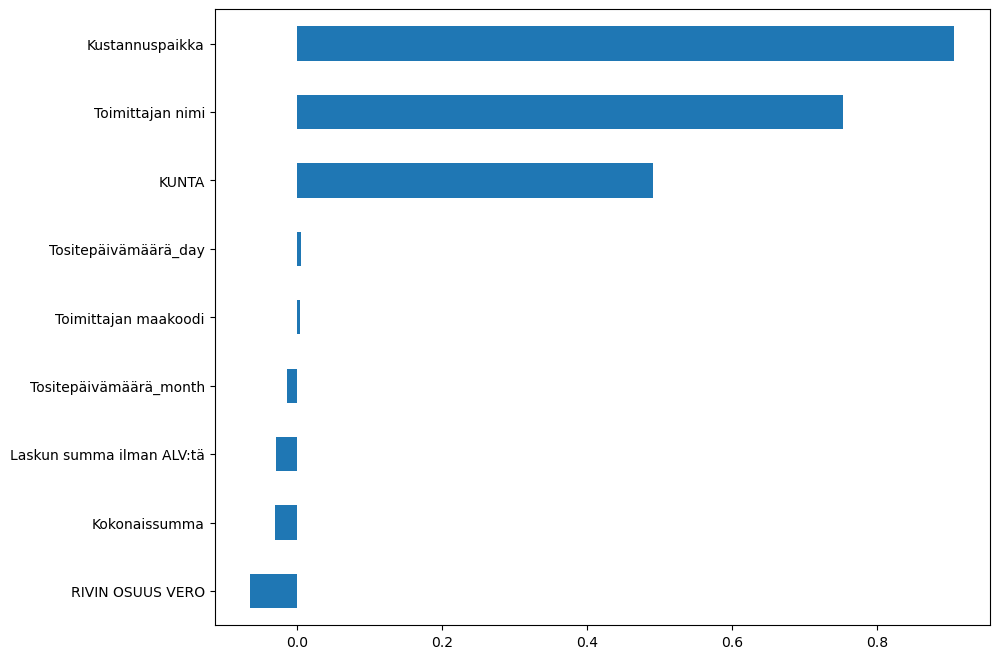

In [46]:
# plotting only the correlation between the target and the features
cor_df = cor['corr'].drop('TILI', axis = 'index').sort_values('TILI')
cor_df['TILI'].plot(kind = 'barh', figsize = (10, 8))

### Features Relation with the Target 'ALV-KODDI'

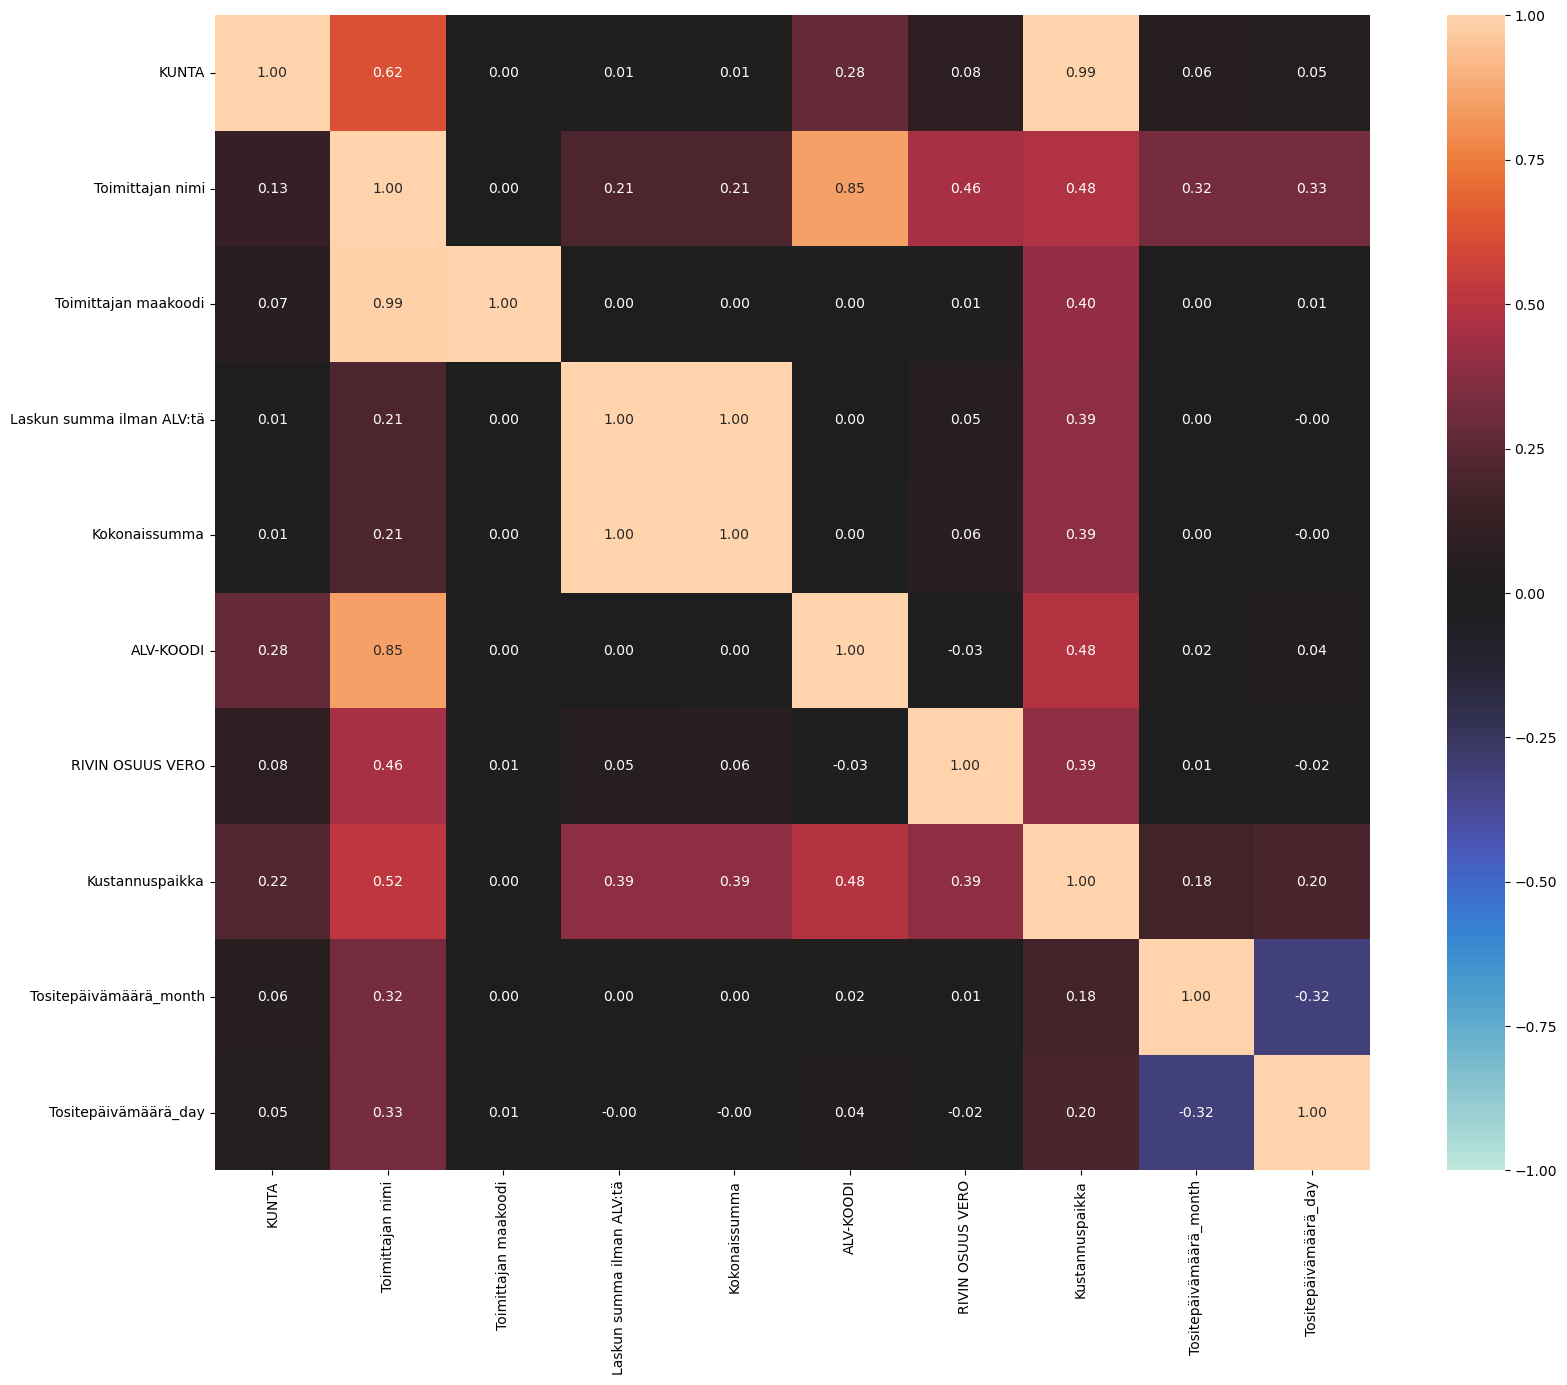

In [47]:
# for the sake of processing time we only will take 60% od the data
cor_alv = associations(df_modeling.drop('TILI', axis = 1).sample(frac = 0.6), figsize = (20, 15), nom_nom_assoc='theil' ) 

<AxesSubplot: >

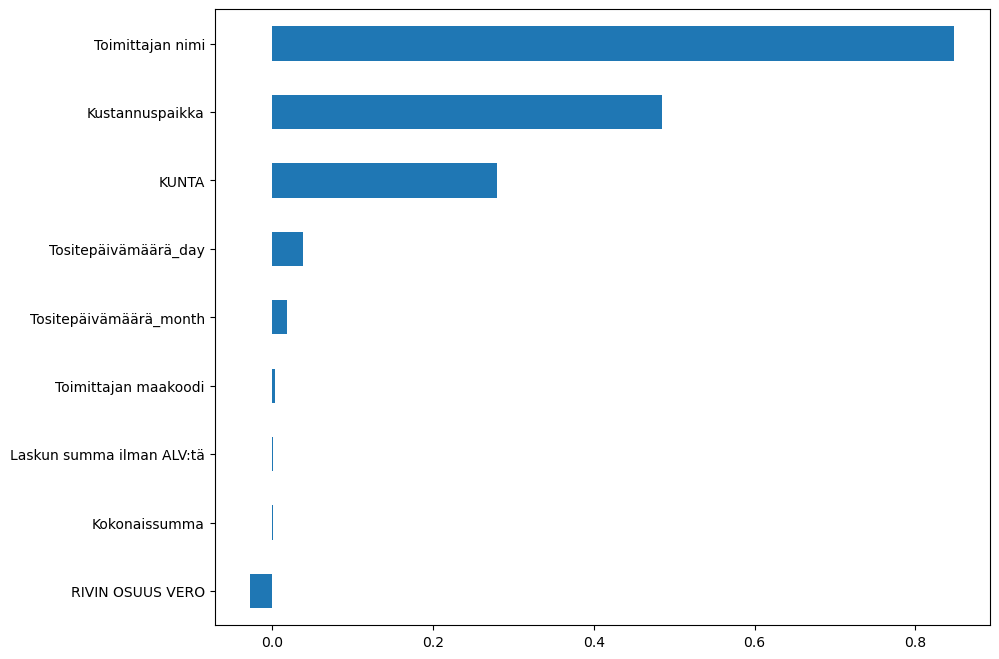

In [48]:
# plotting only the correlation between the target and the features
cor_alv_df = cor_alv['corr'].drop('ALV-KOODI', axis = 'index').sort_values('ALV-KOODI')
cor_alv_df['ALV-KOODI'].plot(kind = 'barh', figsize = (10, 8))